## 1. Setup envivronment

In [1]:
## This is a Juptyer notebook for the Kaggle Project: Abalone Regresssion

# %pip install numpy
# %pip install --upgrade pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install scipy
# %pip install catboost
# %pip install xgboost
# %pip install lightgbm
## Import libaries

## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_log_error

# Machine learning 
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet,Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import lightgbm as lgb

# Dummy
from sklearn.dummy import DummyRegressor

#ML Methods
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Palette
palette = ['#328ca9', '#0e6ea9', '#2c4ea3', '#193882', '#102446']

# Set the style of the visualization
sns.set(style="whitegrid")

## 2. Problem identification

<b> Problem statement: </b>

This is one of the 2024 playground competitions on Kaggle. 
> The major goal of the project is the develop a model for predicting the age of abalone from different physical measurements via the prediction of the number of Rings. The rings is regarded as a continous variable in this project, and thus the problem is a <b>regression problem</b>.

Performance indicator:
> The model performanc will be checked by the Root Mean Squared Logarithmic Error between the actual and predicted "Rings", which is linearly related to the Abalone's age.

Reference:
<br> [1] Walter Reade, Ashley Chow. (2024). Regression with an Abalone Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s4e4

## 3. Reading data

In [2]:
## Reading data
train_df=pd.read_csv('C:\\Users\\Kai Qi Yan\\OneDrive\\文档\\GitHub\\Remote_Abalone_Regression\\Input\\train.csv')#
test_df=pd.read_csv('C:\\Users\\Kai Qi Yan\\OneDrive\\文档\\GitHub\\Remote_Abalone_Regression\\Input\\test.csv')

## 4. Data Inspection:

<b>Step Objectives:</b>
- to examine the data structure, such as the number of rows and columns, as well as data types
- to check for any obvious data quality issues, such as duplicates, missing values or inconsistencies.
- to discover the causes of the data quality issues and propose potential handling methods.

### 4.1 The number of features

In [3]:
# Number of columns and rows in the dataset
print(train_df.columns.values)
print(train_df.shape)

['id' 'Sex' 'Length' 'Diameter' 'Height' 'Whole weight' 'Whole weight.1'
 'Whole weight.2' 'Shell weight' 'Rings']
(90615, 10)


There are 10 columns in the data. 
The Ring is the target, id is the number of entries and others are features.
From the https://archive.ics.uci.edu/dataset/1/abalone, we obtained the following details of the features.
1. Sex: M,F,I(infant)
2. Length: longest shell distance in [mm]
3. Diameter: distance perpendicular to Length in [mm]
4. Height: the height with meat in the shell [mm]
5. Whole weight: the weight of the whole abalone(shell+meat) [g]
6. Shucked weight (named as Whole weight.1): the weight of meat [g]
7. Viscera_weight (named as Whole weight.2): the weight of gut after bleeding [g]
8. Shell weight = the weight of dried shell [g]
9. Rings = +1.5 gives the age in years (Done by cutting the shell through the cone, staining it, and counting the number of rings through a microscope)

> In the training dataset, there are 90615 entries of data.

In [4]:
train_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [5]:
test_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

### 4.2 Data type of the features

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


> There are 1 categorial input: Sex and others are numerical. While the target "Rings" is an integer, the inputs are all floats.

### 4.3 Checking of missing entries and duplicates

#### 4.3.1 Missing entries

##### a. Count the number of missing data

In [8]:
print("TrainData\n\n",train_df.isnull().sum())
print("_"*40)
print("TestData\n\n",test_df.isnull().sum())

TrainData

 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64
________________________________________
TestData

 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


##### b. Understand the cause and type of missing data

Different types of missing data may leads to different handling methods. Following are some examples of missing data and their handling methods. 

- Missing Completely at Random (MCAR):
    - Handling method: Simple imputation
    - Cause: The probability of missing an entry is completely independent of the values of the variables in the dataset, as well as the unobserved data.
    - Example: a sensor malfunctions and randomly fails to record some measurements

- Missing at Random (MAR):
    - Handling method:  advanced imputation techniques
    - Cause: The probability of a data point being missing depends on the observed variables in the dataset, but not on the unobserved (missing) data.
    - Example: income data is more likely to be missing for individuals with lower education levels

- Missing Not at Random (MNAR):
    - Handling methods:  pattern mixture models or selection models
    - Causes: the probability of a data point being missing depends on the unobserved (missing) data itself.
    - Example: individuals with higher income are less likely to report their income

- Systematic Missing Data:
    - Handling methods: Simple imputation or creating Proxy variable
    - Causes: An entire variables or features are missing from the dataset, typically due to issues in data collection or data processing.
    - Example: A sensor was not installed on certain devices, resulting in the absence of data for a specific feature

##### c. Decide a suitable handling method.
- Simple Imputation (mean, median, mode)
- Advanced Imputation (e.g., k-nearest neighbors, regression-based, multiple imputation)
- Pattern mixture models/ Selection models

> There are no missing entries (NaN) in both datasets.

#### 4.3.2 Duplicates

In [9]:
# Check for duplicates
print("TrainData","\n",train_df.duplicated().sum())
print("_"*40)
print("TestData","\n",test_df.duplicated().sum())

TrainData 
 0
________________________________________
TestData 
 0


> There are no duplicated data in both datasets

### 4.4. Drop the target variable from the features:

In [10]:
# Pop the target variable
y = train_df.pop('Rings')

In [11]:
# Separate the numerical and categorical columns
# Numerical columns
num_cols = train_df._get_numeric_data().columns
# Categorical columns
cat_cols = list(set(train_df.columns) - set(num_cols))

## 5. Feature engineering - Creating new features

<b>Step Objectives:</b>

- to create new features that might be more informative for the machine learning model. (for linear models, creating features involving ratios maybe benefitial as they are hard to learn in linear models)

- to transform or encode existing features to improve their representation

- to identify and handle any problematic features, such as high-cardinality categorical variables or highly correlated features.[1]

> Note that:
> - more new features can be created in the later steps as the results of the <b>Exploratory data analysis (EDA)</b>, during the uni/bi/multi- variate analysis.
> - the transformation of features or handling of problematic features may take place as a step of the preprocessing pipeline in a later step
> - it is better to create as many as possible new features as we will decide which to keep in the <b>feature selection step</b>.

The following new features are included in the datasets:

1. Aspect ratio: This is a shape desriptor for the abalone, which roughly represent the roundness of the Abalone. This feature is selected as it is hypothesized that the roundness of the abalone may vary in different sexes. [2]

2. Ellipsoidal Volume: This is the calculated volume assuming the abalone is an ideal ellipsoid. This feature is created for potentially removing one of the following features: Length, Diameter or Height. 

3. Meat/Whole abalone ratio: This feature is added as it is hypotheisized that the meat mass portion of the abalone may vary in sexes and will change over ages. 

4. Gut/Meat Ratio: This feature is added with the same reason as feature 3. 

5. Density: This feature is added with the same reason as feature 3. 


<br> Reference:
<br> [1] https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline
<br> [2] https://imagej.net/ij/docs/guide/146-30.html#toc-Subsection-30.7
<br> [3] https://www.youtube.com/watch?v=X4pWmkxEikM 


In [12]:
# Create a clean copy of the data as a baseline for comparing the feature engineering performance later
train_df_clean = train_df.copy()

In [13]:
# Define a function to 
def FeatureEngineering(df):
    #1 Aspect Ratio
    df['Aspect ratio'] = df['Length']/df['Diameter']

    #2 Ellipsoid Volume
    df['Volume'] = (4/3)*np.pi*(df['Length']/2)*(df['Diameter']/2)*df['Height']/2

    #3 Meat/Abalone Ratio
    df['Meat ratio'] = df['Whole weight.1']/df['Whole weight']

    #4 Gut/Meat Ratio
    df['Gut meat ratio'] = df['Whole weight.2']/df['Whole weight.1']

    #5 Wet density of the Abalone
    df['Density'] = df ['Whole weight']/df['Volume']

    #return data
    return df

#Add the new features to the data
train_df=FeatureEngineering(train_df)
test_df=FeatureEngineering(test_df)

# Replace entries with infinities
train_df.replace([np.inf, -np.inf], 0, inplace=True)
test_df.replace([np.inf, -np.inf], 0, inplace=True)

# Drop unnecessary features
train_df.drop(['id'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)

# Add the new features to the numerical columns
num_cols = train_df._get_numeric_data().columns

## 6. Univariate Analysis

The idea of the step 6- 8 are to examine the characteristics of each variable (both features and targets), including their distributions, and the interactions between them. 

<b> Step Objectivs</b>

- to analyze each feature individually to collect some descriptive statistics, such as distribution, range
- to identify potential skewness or <b>outliers</b> as well as proposing handling methods
- to Use visualizations like histograms, box plots, or kernel density plots to explore the distribution of each feature.

<b> Potential feature enginnering techniques <b>
1. Normalization/standardization
2. Identify problematic data, such as outliers, and propose handling methods
3. Binning of continuous features into new categorial features



### 6.1 Target variable

In [14]:
y.describe()

count    90615.000000
mean         9.696794
std          3.176221
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: Rings, dtype: float64

### 6.2. Numerical features

#### 6.2.1. Descriptive statistics of numerical features

In [15]:
# Descriptive statistics of numerical variables in the dataset
train_df[num_cols].describe()

Length      Diameter        Height  Whole weight  Whole weight.1  \
count  90615.000000  90615.000000  90615.000000  90615.000000    90615.000000   
mean       0.517098      0.401679      0.135464      0.789035        0.340778   
std        0.118217      0.098026      0.038008      0.457671        0.204428   
min        0.075000      0.055000      0.000000      0.002000        0.001000   
25%        0.445000      0.345000      0.110000      0.419000        0.177500   
50%        0.545000      0.425000      0.140000      0.799500        0.330000   
75%        0.600000      0.470000      0.160000      1.067500        0.463000   
max        0.815000      0.650000      1.130000      2.825500        1.488000   

       Whole weight.2  Shell weight  Aspect ratio        Volume    Meat ratio  \
count    90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean         0.169422      0.225898      1.295142      0.017200      0.430878   
std          0.100909      0.130203      0.059678      0.010298      0.078802   
min          0.000500      0.001500      0.517241      0.000000      0.051724   
25%          0.086500      0.120000      1.262136      0.008859      0.397008   
50%          0.166000      0.225000      1.288889      0.016933      0.431461   
75%          0.232500      0.305000      1.321839      0.023437      0.464579   
max          0.760000      1.005000      3.923077      0.155756      4.782609   

       Gut meat ratio       Density  
count    90615.000000  90615.000000  
mean         0.508287     47.161897  
std          0.104979      7.701057  
min          0.012987      0.000000  
25%          0.443974     43.130838  
50%          0.496644     46.463578  
75%          0.559288     50.193227  
max          5.500000    946.060343

In Height, the minimum value is 0, indicating a missing value as the height of an abalone can never be 0.
Looking at the maximum/minimum and the mean values, the large differences between the them may indicate the features are either skewed or with outliers. 
This will be check again in the distribution plot again in the later section.

#### 6.1.2. Relative variance of numerical features

In [16]:
# Compute the relative variance of the numerical features
CoeffVar=np.var(train_df[num_cols])/train_df[num_cols].mean()
CoeffVar.sort_values(ascending=True)

c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Aspect ratio      0.002750
Volume            0.006166
Height            0.010664
Meat ratio        0.014412
Gut meat ratio    0.021682
Diameter          0.023922
Length            0.027026
Whole weight.2    0.060101
Shell weight      0.075046
Whole weight.1    0.122633
Whole weight      0.265464
Density           1.257490
dtype: float64

#### 6.1.3. Distribution of numerical features

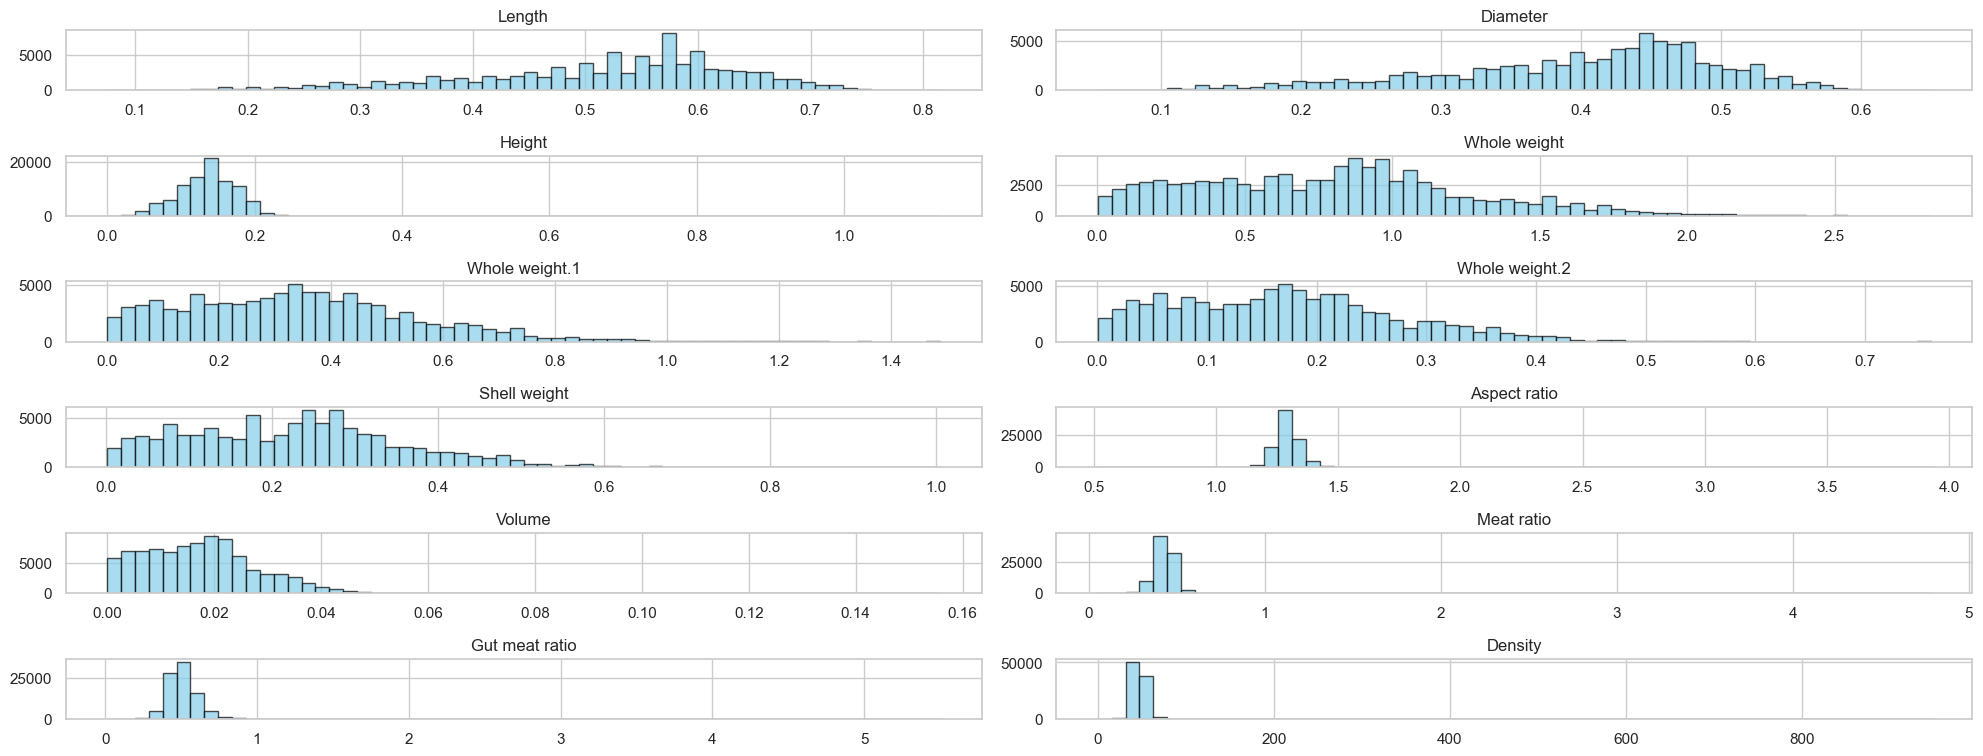

In [17]:
# Plot the distribution of the feature variables
axes = train_df.hist(bins=60, figsize=(20,15), color='skyblue', edgecolor='black', alpha=0.7, layout=(len(train_df[num_cols].columns),2))

# Add labels
for ax, column in zip(axes.flatten(), train_df[num_cols].columns):
    ax.set_title(column)

# Improve layout
plt.tight_layout()
plt.show()

#### 6.1.4. Outliers in numerical features

<b> Step Objectives: </b>

- to identify and visulize the outliers
- to understand the cause of outliers
    - Data entry errors
        - e.g. typos
    - Measurement error:
        - e.g. incorrect sensor calibrations
    - Execution Error: 
        - e.g. bugs in data transmission or accidental duplication of records.
    - Genuine extreme values

- to decide on the Handling Approach:
    - Retain the outliers if they are legitimate and important for the analysis.
    - Remove the outliers if they are erroneous or have a disproportionate influence on the analysis.
    - Modify the outliers by winsorizing (replacing with a less extreme value) or transforming the data.
- to evaluate the Impact
    -Assess how the outlier handling approach affects the downstream analysis and model performance.

##### a. Visualize the outliers 

One classical way to identify outliers from a sample is by using the Interquartile range (IQR) method, which can be visualized in a box plot.[6]

<br> References: 
<br> [1] https://medium.com/analytics-vidhya/how-to-handle-outliers-in-machine-learning-5d8105c708e5
<br> [2] https://llego.dev/posts/outlier-detection-handling-python-guide/
<br> [3] https://scikit-learn.org/stable/modules/outlier_detection.html 
<br> [4] https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.
<br> [5] html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py 
<br> [6] https://en.wikipedia.org/wiki/Interquartile_range


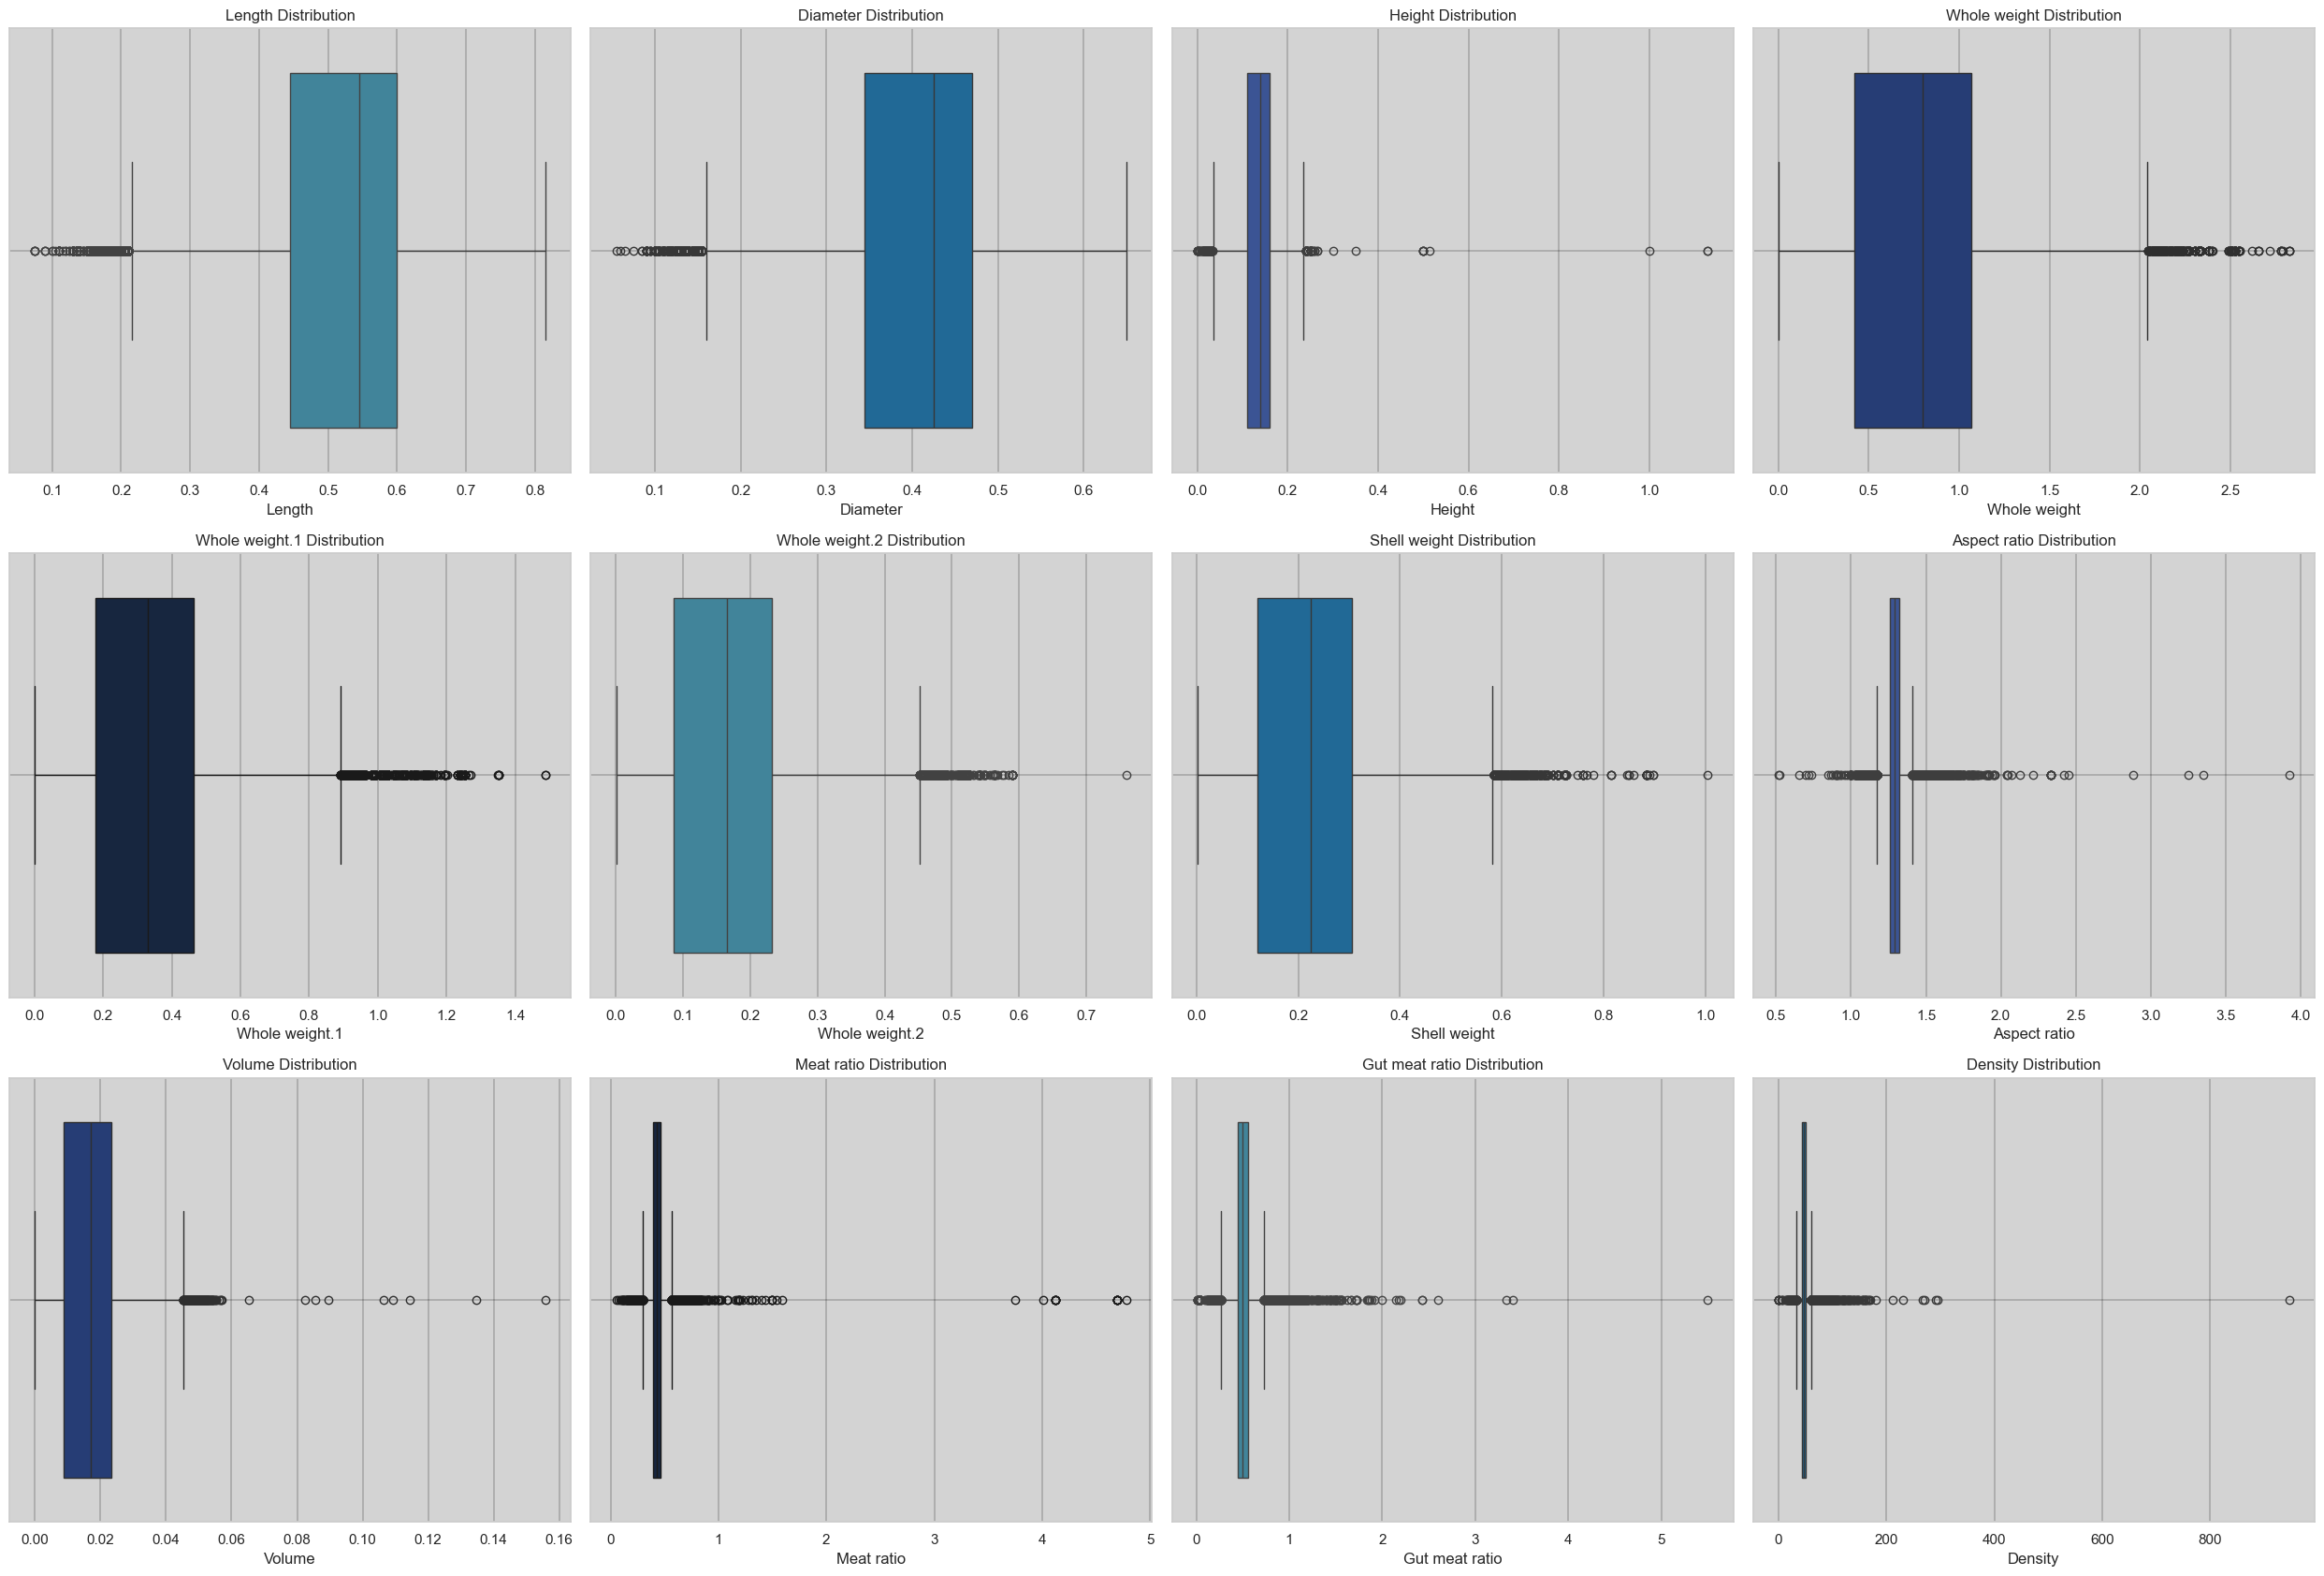

In [18]:
#Define a BOX plot function to examine the position of outliers in the numerical features

def MultiBoxplot(df,num_cols,f_cols=4,color=palette):
    f_rows = np.ceil(len(num_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))

    axes = axes.flatten()
    for i, j in enumerate(num_cols):
        sns.boxplot(x=j, data=df, ax=axes[i],color=color[i%5])
        axes[i].set_title(f'{j} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(num_cols) % f_cols != 0:
        for i in range(len(num_cols)%f_cols):
            fig.delaxes(axes[- i - 1])


MultiBoxplot(df=train_df,num_cols=num_cols)

It is observed that 
A function is defined in this step to identify and handle the outliers. The outliers are identified based on the IQR methods. 

> Note that we used the IQR method for identifying the outliers, which assumes a normal distribution of data that is not usually the case. 

In [19]:
#Define a outlier handling function 

def OutlierHandling(df,num_cols=train_df._get_numeric_data().columns,method:str=None):
    # Loop through each numerical column
    for col in num_cols:
        # Calculate the first quartile
        Q1 = df[col].quantile(0.25)
        # Calculate the third quartile
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR

        if method == "Filter":
            # Filter the outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            
        elif method == "Replace":
            # Replace the outliers by the lower and upper bounds
            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound

        elif method == "Replace with encodings":
            # Set new features indicating the presence of outliers
            df[col + '_outlier'] = 0
            df.loc[df[col] < lower_bound, col + '_outlier'] = -1
            df.loc[df[col] > upper_bound, col + '_outlier'] = 1
            # Replace the outliers by the lower and upper bounds
            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound

        else:
            # Set new features indicating the presence of outliers
            df[col + '_outlier'] = 0
            df.loc[df[col] < lower_bound, col + '_outlier'] = -1
            df.loc[df[col] > upper_bound, col + '_outlier'] = 1

    return df


In [20]:
# Investigate the outliers by looking at randomly picked samples in each feature:
# Create a DataFrame for the outliers
train_OutId = train_df.copy()
train_OutId = OutlierHandling(train_OutId)
# Investigate the outliers by looking at randomly picked samples
group=train_OutId.groupby(by='Whole weight_outlier').sample(n=5, random_state=1)
group

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
58619   I   0.410     0.310   0.100        0.3345          0.1585   
90273   M   0.625     0.490   0.180        1.1265          0.5065   
21635   I   0.315     0.240   0.070        0.1485          0.0545   
53896   I   0.395     0.295   0.095        0.2530          0.0960   
3224    I   0.600     0.480   0.170        1.0455          0.4445   
66123   F   0.700     0.620   0.195        2.5260          0.9330   
55702   M   0.725     0.550   0.215        2.1240          0.8115   
13018   F   0.815     0.565   0.170        2.0810          0.7415   
16278   F   0.695     0.530   0.200        2.0475          0.7595   
50018   M   0.720     0.570   0.190        2.1650          1.1075   

       Whole weight.2  Shell weight  Aspect ratio    Volume  ...  \
58619          0.0735        0.0900      1.322581  0.006655  ...   
90273          0.2520        0.2750      1.275510  0.028863  ...   
21635          0.0185        0.0450      1.312500  0.002771  ...   
53896          0.0540        0.0700      1.338983  0.005796  ...   
3224           0.1960        0.3150      1.250000  0.025635  ...   
66123          0.5900        0.6200      1.129032  0.044312  ...   
55702          0.5195        0.5985      1.318182  0.044889  ...   
13018          0.4655        0.5000      1.442478  0.040988  ...   
16278          0.4195        0.6095      1.311321  0.038574  ...   
50018          0.5420        0.4040      1.263158  0.040828  ...   

       Height_outlier  Whole weight_outlier  Whole weight.1_outlier  \
58619               0                     0                       0   
90273               0                     0                       0   
21635               0                     0                       0   
53896               0                     0                       0   
3224                0                     0                       0   
66123               0                     1                       1   
55702               0                     1                       0   
13018               0                     1                       0   
16278               0                     1                       0   
50018               0                     1                       1   

       Whole weight.2_outlier  Shell weight_outlier  Aspect ratio_outlier  \
58619                       0                     0                     0   
90273                       0                     0                     0   
21635                       0                     0                     0   
53896                       0                     0                     0   
3224                        0                     0                     0   
66123                       1                     1                    -1   
55702                       1                     1                     0   
13018                       1                     0                     1   
16278                       0                     1                     0   
50018                       1                     0                     0   

       Volume_outlier  Meat ratio_outlier  Gut meat ratio_outlier  \
58619               0                   0                       0   
90273               0                   0                       0   
21635               0                   0                       0   
53896               0                   0                       0   
3224                0                   0                       0   
66123               0                   0                       0   
55702               0                   0                       0   
13018               0                   0                       0   
16278               0                   0                       0   
50018               0                   0                       0   

       Density_outlier  
58619                0  
90273                0  
21635                0  
53896  

> Look at the Outliers, what are the possible causes and the potential handling methods?

In [21]:
# Initialize a new dataframe
train_wo_O = train_df.copy()

# Apply the OutlierHandling function
train_wo_O=OutlierHandling(train_wo_O,method="Replace with encodings")

# Check the new features
train_wo_O

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0       F  0.5500    0.4300   0.150        0.7715          0.3285   
1       F  0.6300    0.4900   0.145        1.1300          0.4580   
2       I  0.2125    0.1575   0.035        0.0210          0.0055   
3       M  0.5950    0.4750   0.150        0.9145          0.3755   
4       I  0.5550    0.4250   0.130        0.7820          0.3695   
...    ..     ...       ...     ...           ...             ...   
90610   M  0.3350    0.2350   0.075        0.1585          0.0685   
90611   M  0.5550    0.4250   0.150        0.8790          0.3865   
90612   I  0.4350    0.3300   0.095        0.3215          0.1510   
90613   I  0.3450    0.2700   0.075        0.2000          0.0980   
90614   I  0.4250    0.3250   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  Aspect ratio    Volume  ...  \
0              0.1465        0.2400      1.279070  0.018575  ...   
1              0.2765        0.3200      1.285714  0.023437  ...   
2              0.0030        0.0050      1.411394  0.000230  ...   
3              0.2055        0.2500      1.252632  0.022197  ...   
4              0.1600        0.1975      1.305882  0.016056  ...   
...               ...           ...           ...       ...  ...   
90610          0.0370        0.0450      1.411394  0.003092  ...   
90611          0.1815        0.2400      1.305882  0.018526  ...   
90612          0.0785        0.0815      1.318182  0.007140  ...   
90613          0.0490        0.0700      1.277778  0.003658  ...   
90614          0.0785        0.1050      1.307692  0.007232  ...   

       Height_outlier  Whole weight_outlier  Whole weight.1_outlier  \
0                   0                     0                       0   
1                   0                     0                       0   
2                  -1                     0                       0   
3                   0                     0                       0   
4                   0                     0                       0   
...               ...                   ...                     ...   
90610               0                     0                       0   
90611               0                     0                       0   
90612               0                     0                       0   
90613               0                     0                       0   
90614               0                     0                       0   

       Whole weight.2_outlier  Shell weight_outlier  Aspect ratio_outlier  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     0                     1   
3                           0                     0                     0   
4                           0                     0                     0   
...                       ...                   ...                   ...   
90610                       0                     0                     1   
90611                       0                     0                     0   
90612                       0                     0                     0   
90613                       0                     0                     0   
90614                       0                     0                     0   

       Volume_outlier  Meat ratio_outlier  Gut meat ratio_outlier  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                  -1                       0   
3                   0                   0                       0   
4                   0                   0                       0   
...               ...                 ...                     ...   
90610               0                   0                       0   
90611               0         

In [22]:
# Set the a list containing the indexes of the outliers columns
out_cols = [col for col in train_wo_O.columns if 'outlier' in col]
out_cols

['Length_outlier',
 'Diameter_outlier',
 'Height_outlier',
 'Whole weight_outlier',
 'Whole weight.1_outlier',
 'Whole weight.2_outlier',
 'Shell weight_outlier',
 'Aspect ratio_outlier',
 'Volume_outlier',
 'Meat ratio_outlier',
 'Gut meat ratio_outlier',
 'Density_outlier']

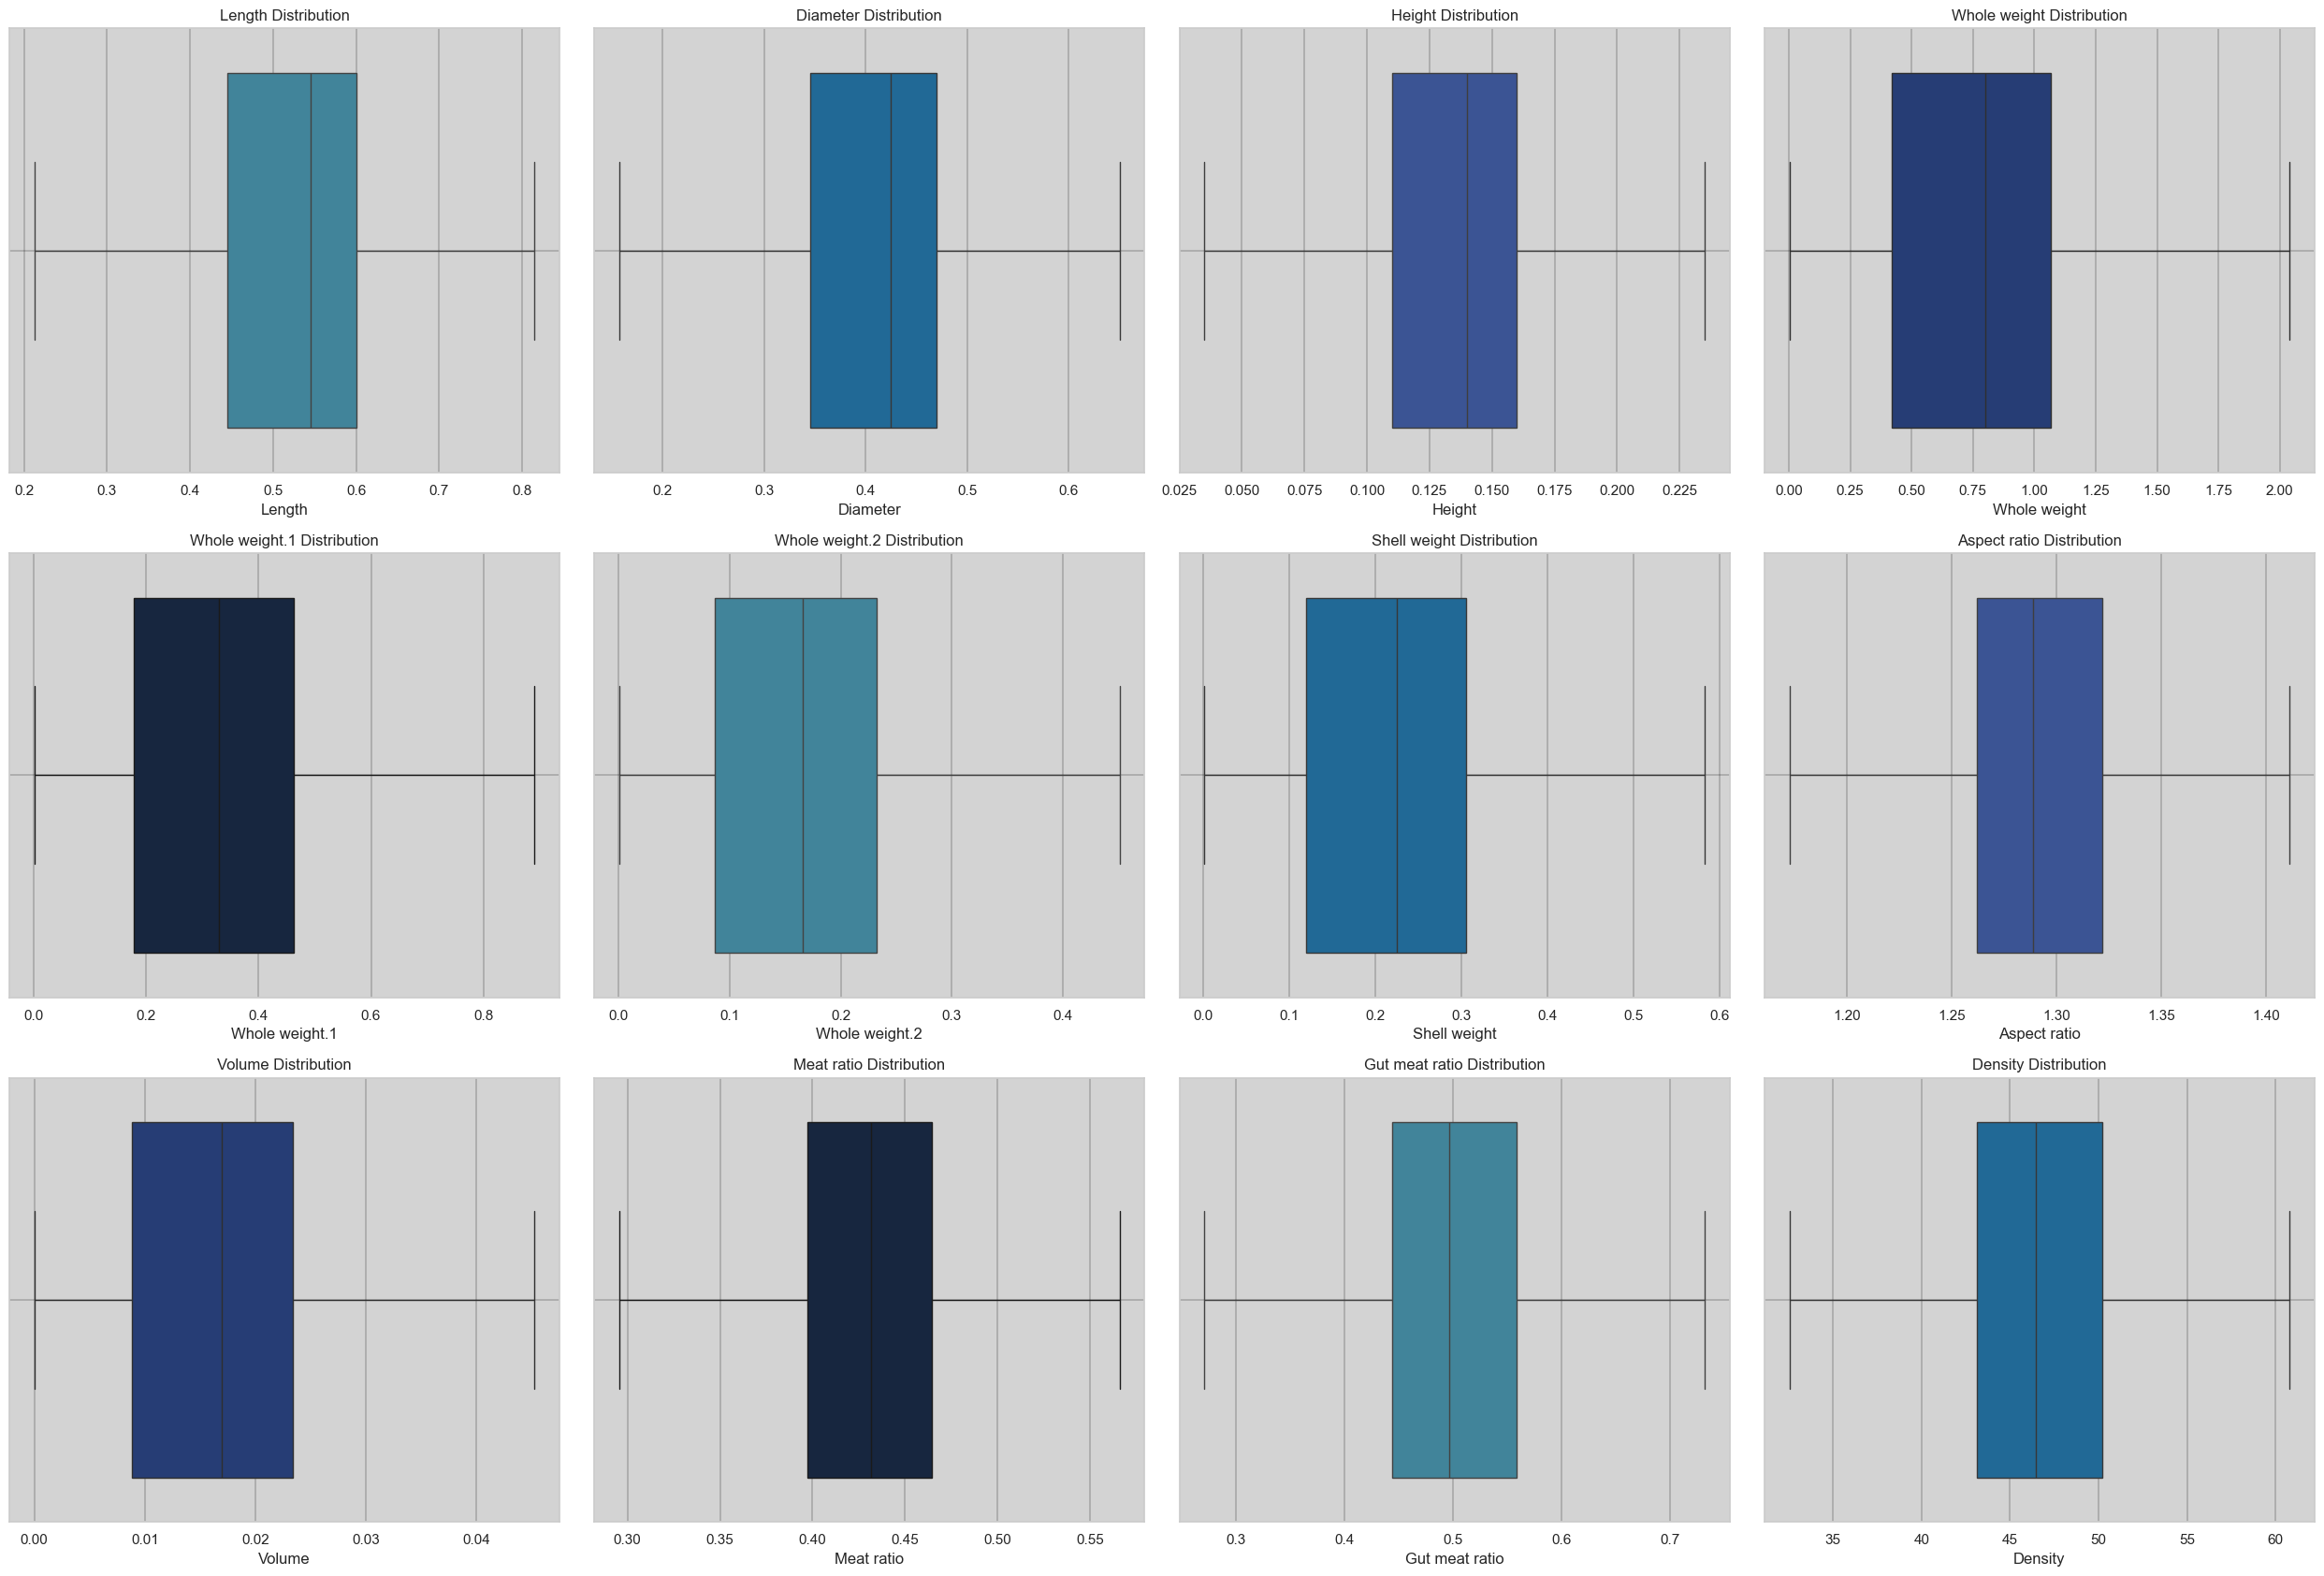

In [23]:
# Confirm the removal of outliers by plotting the boxplots
MultiBoxplot(df=train_wo_O,num_cols=num_cols)

### 6.3 Categorial features

#### 6.3.1. Distribution of categorial features

In [24]:
# Descriptive statistics of categorical features
train_wo_O.describe(include=['O'])

Sex
count   90615
unique      3
top         I
freq    33093

In [25]:
train_wo_O.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

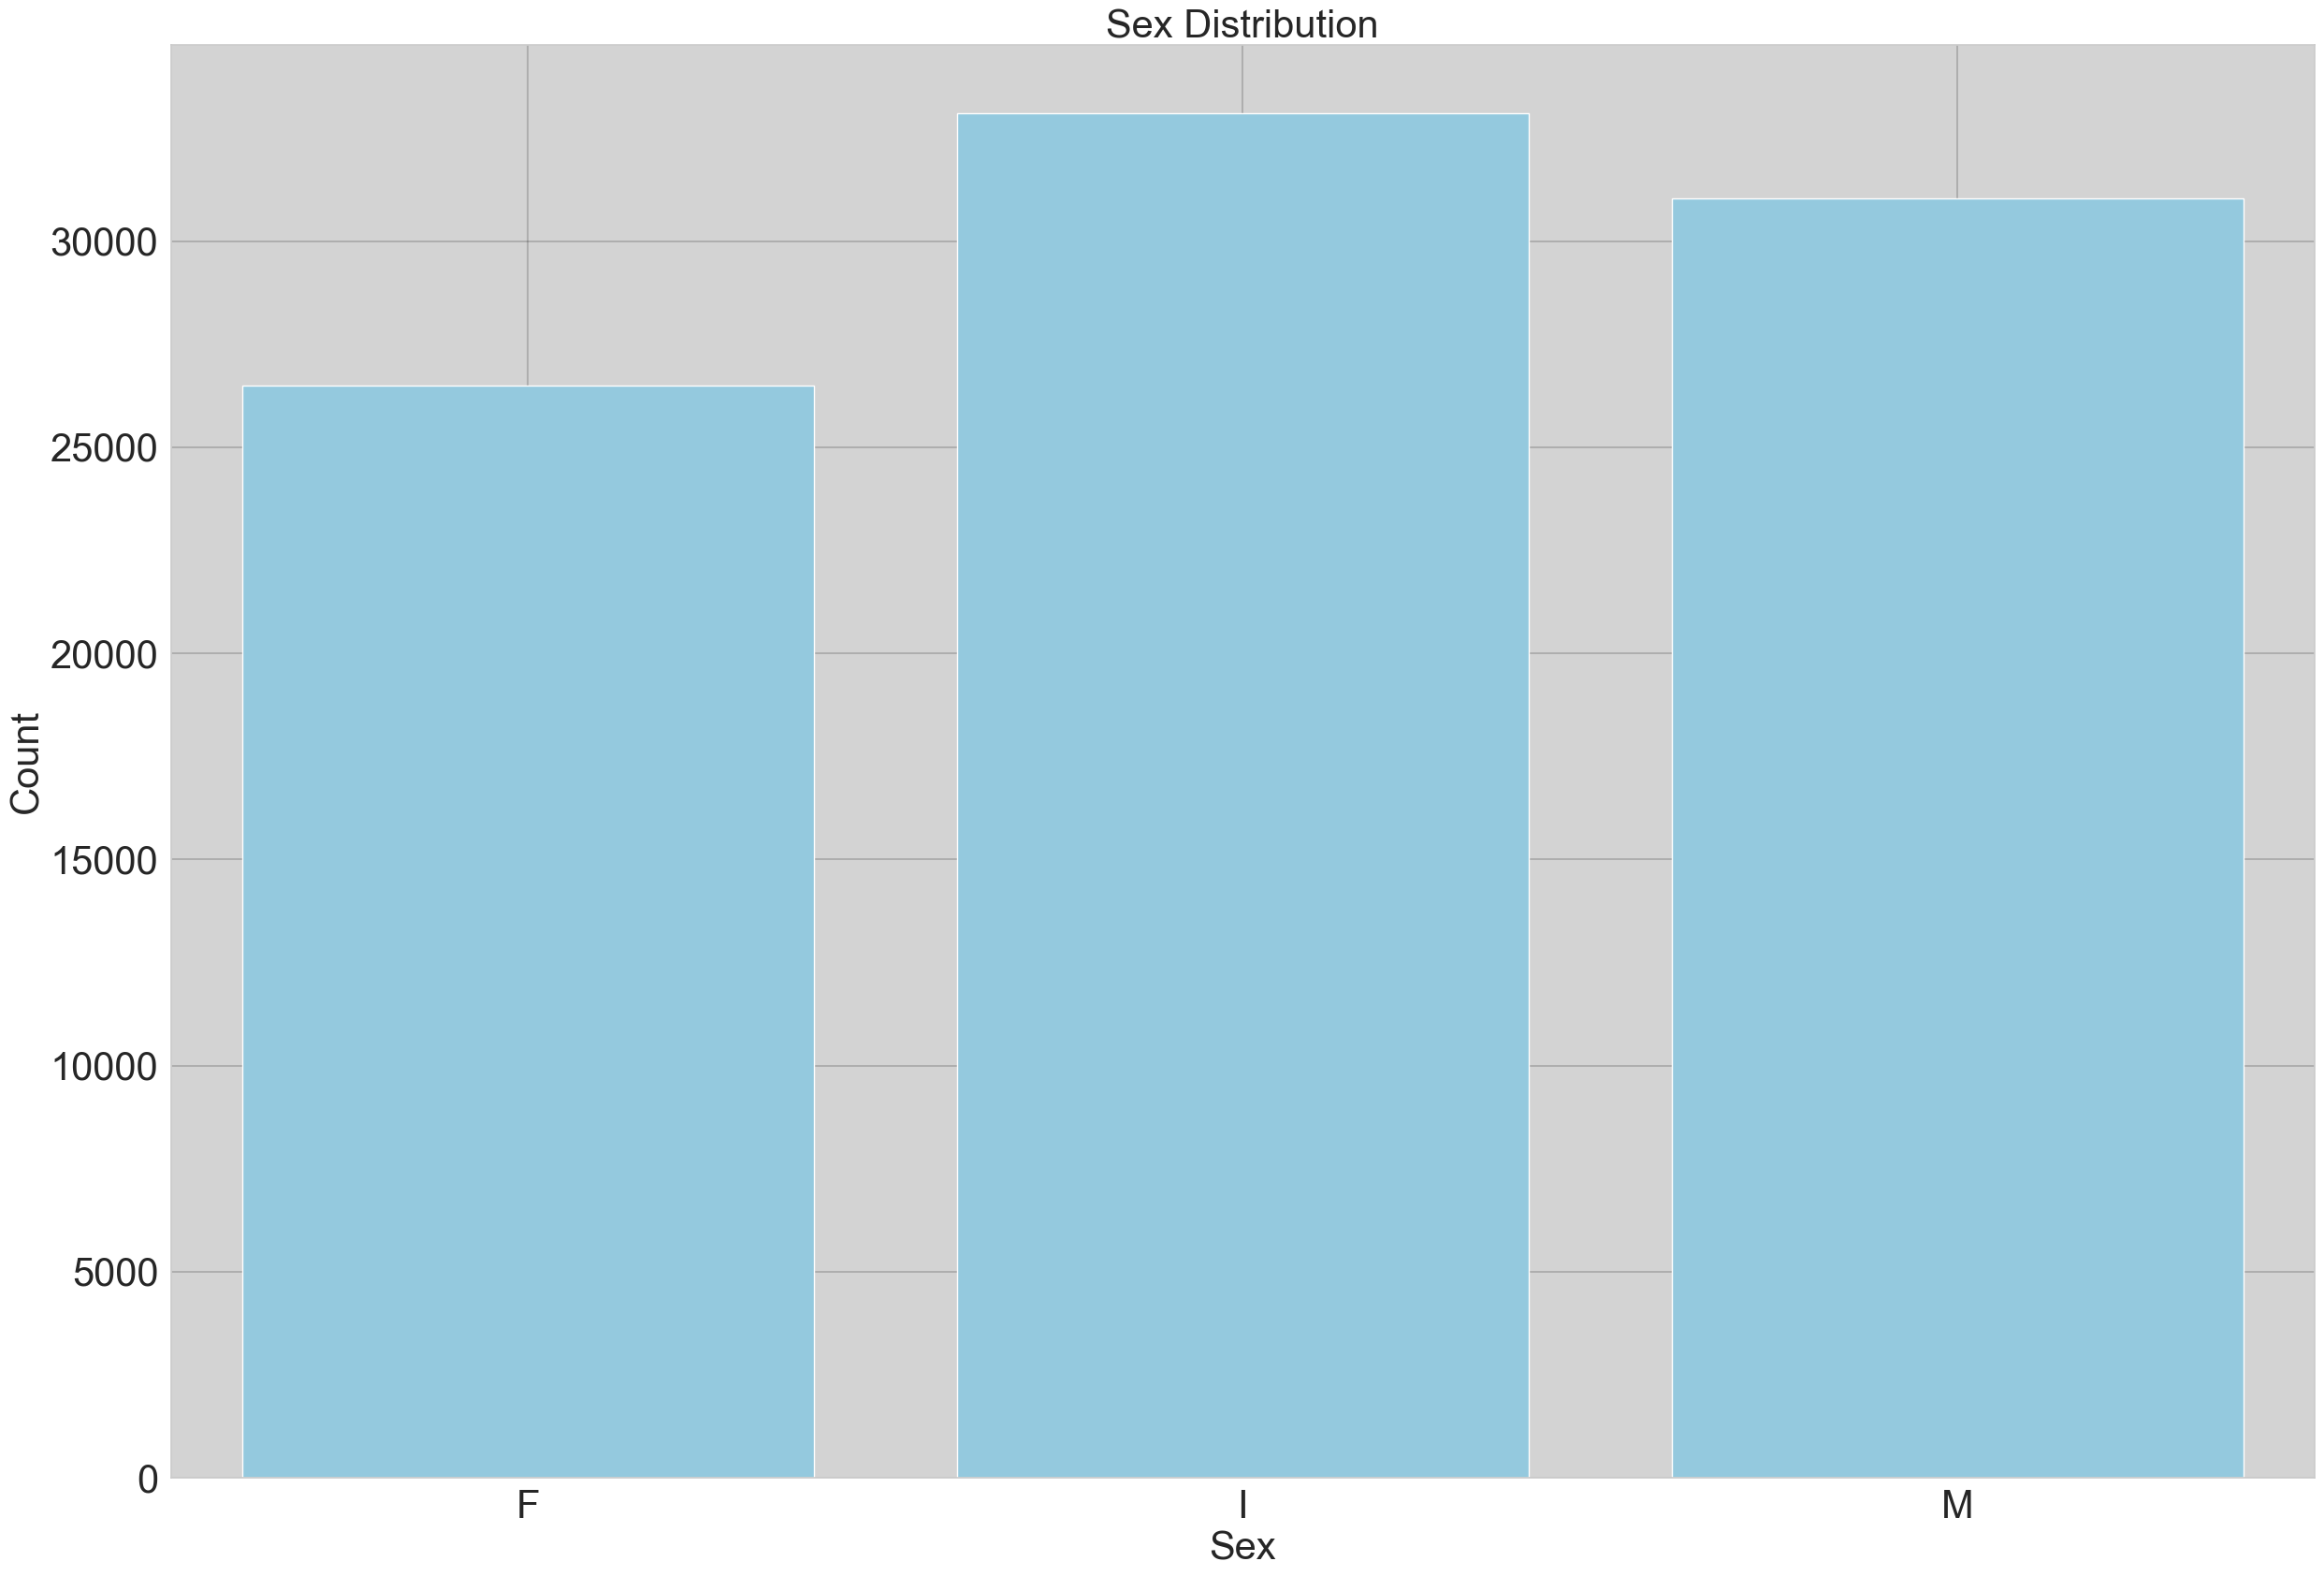

In [26]:
# Define a function to plot the distribution of categorical features
def MultiCountplot(df, cat_cols, f_cols=4, color='skyblue'):
    f_rows = np.ceil(len(cat_cols)/f_cols).astype(int)
    if f_rows == 1:
        f_cols = len(cat_cols)
        fig,axes =plt.subplots(f_rows, f_cols, figsize=(25, 17))
        axes = [axes]
    else: 
        fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
        axes = axes.flatten()
    for i, j in enumerate(cat_cols):
        sns.countplot(x=j, data=df, ax=axes[i], color=color[i%5] if isinstance(color, list) else color)
        axes[i].set_title(f'{j} Distribution', fontsize=30)
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        axes[i].tick_params(axis='x', labelsize=30)
        axes[i].tick_params(axis='y', labelsize=30)
        axes[i].set_xlabel(j, fontsize=30)
        axes[i].set_ylabel('Count', fontsize=30)
        plt.tight_layout()

    # ignore the empty plots
    if len(cat_cols) % f_cols != 0:
        for i in range(len(cat_cols) % f_cols):
            fig.delaxes(axes[-1 - i])

# Plot the distribution of categorical features
MultiCountplot(df=train_wo_O, cat_cols=cat_cols, color='skyblue')


## 7 Bivariate analysis

<b> Step Objectives</b>
- to examine the relationship between the target variable and each feature.

- to investigate the relationships between pairs of features.
    - numerical - numerical feature 
        - Regression analysis: to fit a regression (linear/polynomial/...) to the data to describe the mathematical relationship between two numerical variables
        -  Residual analysis: to examine the residuals (the differences between the observed values and the predicted values) to check the assumptions of the regression model, such as linearity, homoscedasticity, and normality.
        - Visualization: Scatterplot, ICE plot, heatmap of correlations
    -   Categorial - numerical/categorial
        - analyze the relation ship between the variable by techniques such as:
            - contingency tables, 
            - chi-square tests, or 
            - ANOVA
        - Visualization: Swarmplot

### 7.1 Hypothesis about the features relations

#### 7.1.1. Feature - target relation:
##### a. Numerical features - target:
   - Length:         +ve, reduced slope when rings increase
   - Diameter:       +ve, reduced slope when rings increase        
   - Height:         +ve, reduced slope when rings increase  
   - Whole weight:   +ve, reduced slope when rings increase  
   - Whole weight.1: +ve, reduced slope when rings increase
   - Whole weight.2: +ve, reduced slope when rings increase    
   - Shell weight:   +ve, reduced slope when rings increase
   - Aspect ratio:   should be fairly the same
   - Volume:         +ve, reduced slope when rings increase
   - Meat ratio:     +ve, reduced slope when rings increase
   - Gut meat ratio: +ve, reduced slope when rings increase
   
##### b. Categorial features - target:
   - Sex: "I" should have smaller number of rings. "M" and "F" should show no difference in ring numbers.
#### 7.1.2. Feature - Feature relation:
##### a. Numerical - numerical:
   - the dimensions desciptors: Length, Diameter, Height, and Volume: +ve
   - the weight desciptors: Whole weight, Shucked weight, Viscera_weight, Shell_weight: +ve
   - the aspect ratio: Length: +ve, Diameter: -ve
   - the Meat ratio: Whole weight.1:+ve, Whole weight:-ve
   - the Gut meat ratio: Whole weight.2:+ve, Whole weight.1: -ve
##### b. Numerical- categorial:
   - "I" should have smaller Length, Diameter, Height, and Volume as well as the weights compared to "F" and "M"
   - "F" and "M" may have different distribution in terms of dimensions, weights and the ratios.

### 7.2 Inspection of the numerical features-targets 
#### a. Using mutual information

In [27]:
# Define a function to calculate the adjustetd Mutual information between the features and the target variable 
def MutualInformation(df, y, num_cols):
    # Import the mutual_info_classif function from sklearn
    from sklearn.feature_selection import mutual_info_regression
    # Create a DataFrame to store the mutual information values
    mi_df = pd.DataFrame(mutual_info_regression(df[num_cols], y, discrete_features=False), index=num_cols, columns=['MI'])
    # Sort the values in descending order
    mi_df = mi_df.sort_values(by='MI', ascending=False)
    return mi_df

# Calculate the Mutual Information
mi_df = MutualInformation(train_wo_O, y, num_cols)
mi_df

MI
Shell weight    0.674702
Volume          0.580381
Whole weight    0.572961
Whole weight.2  0.547389
Height          0.546227
Diameter        0.545523
Length          0.532095
Whole weight.1  0.512880
Aspect ratio    0.346680
Meat ratio      0.230213
Gut meat ratio  0.178618
Density         0.077690

#### b. Using correlation

In [28]:
# Compute the correlation between the numerical features and the target variable
correlation = train_wo_O[num_cols].corrwith(y).sort_values(ascending=False)
correlation

Shell weight      0.696532
Height            0.674902
Diameter          0.636836
Volume            0.627651
Length            0.623870
Whole weight      0.619668
Whole weight.2    0.591219
Whole weight.1    0.520774
Gut meat ratio    0.167937
Density          -0.200398
Meat ratio       -0.264268
Aspect ratio     -0.399528
dtype: float64

#### c. Visualize the relation between the numerical features and target variables

##### c.i. Scatterplots

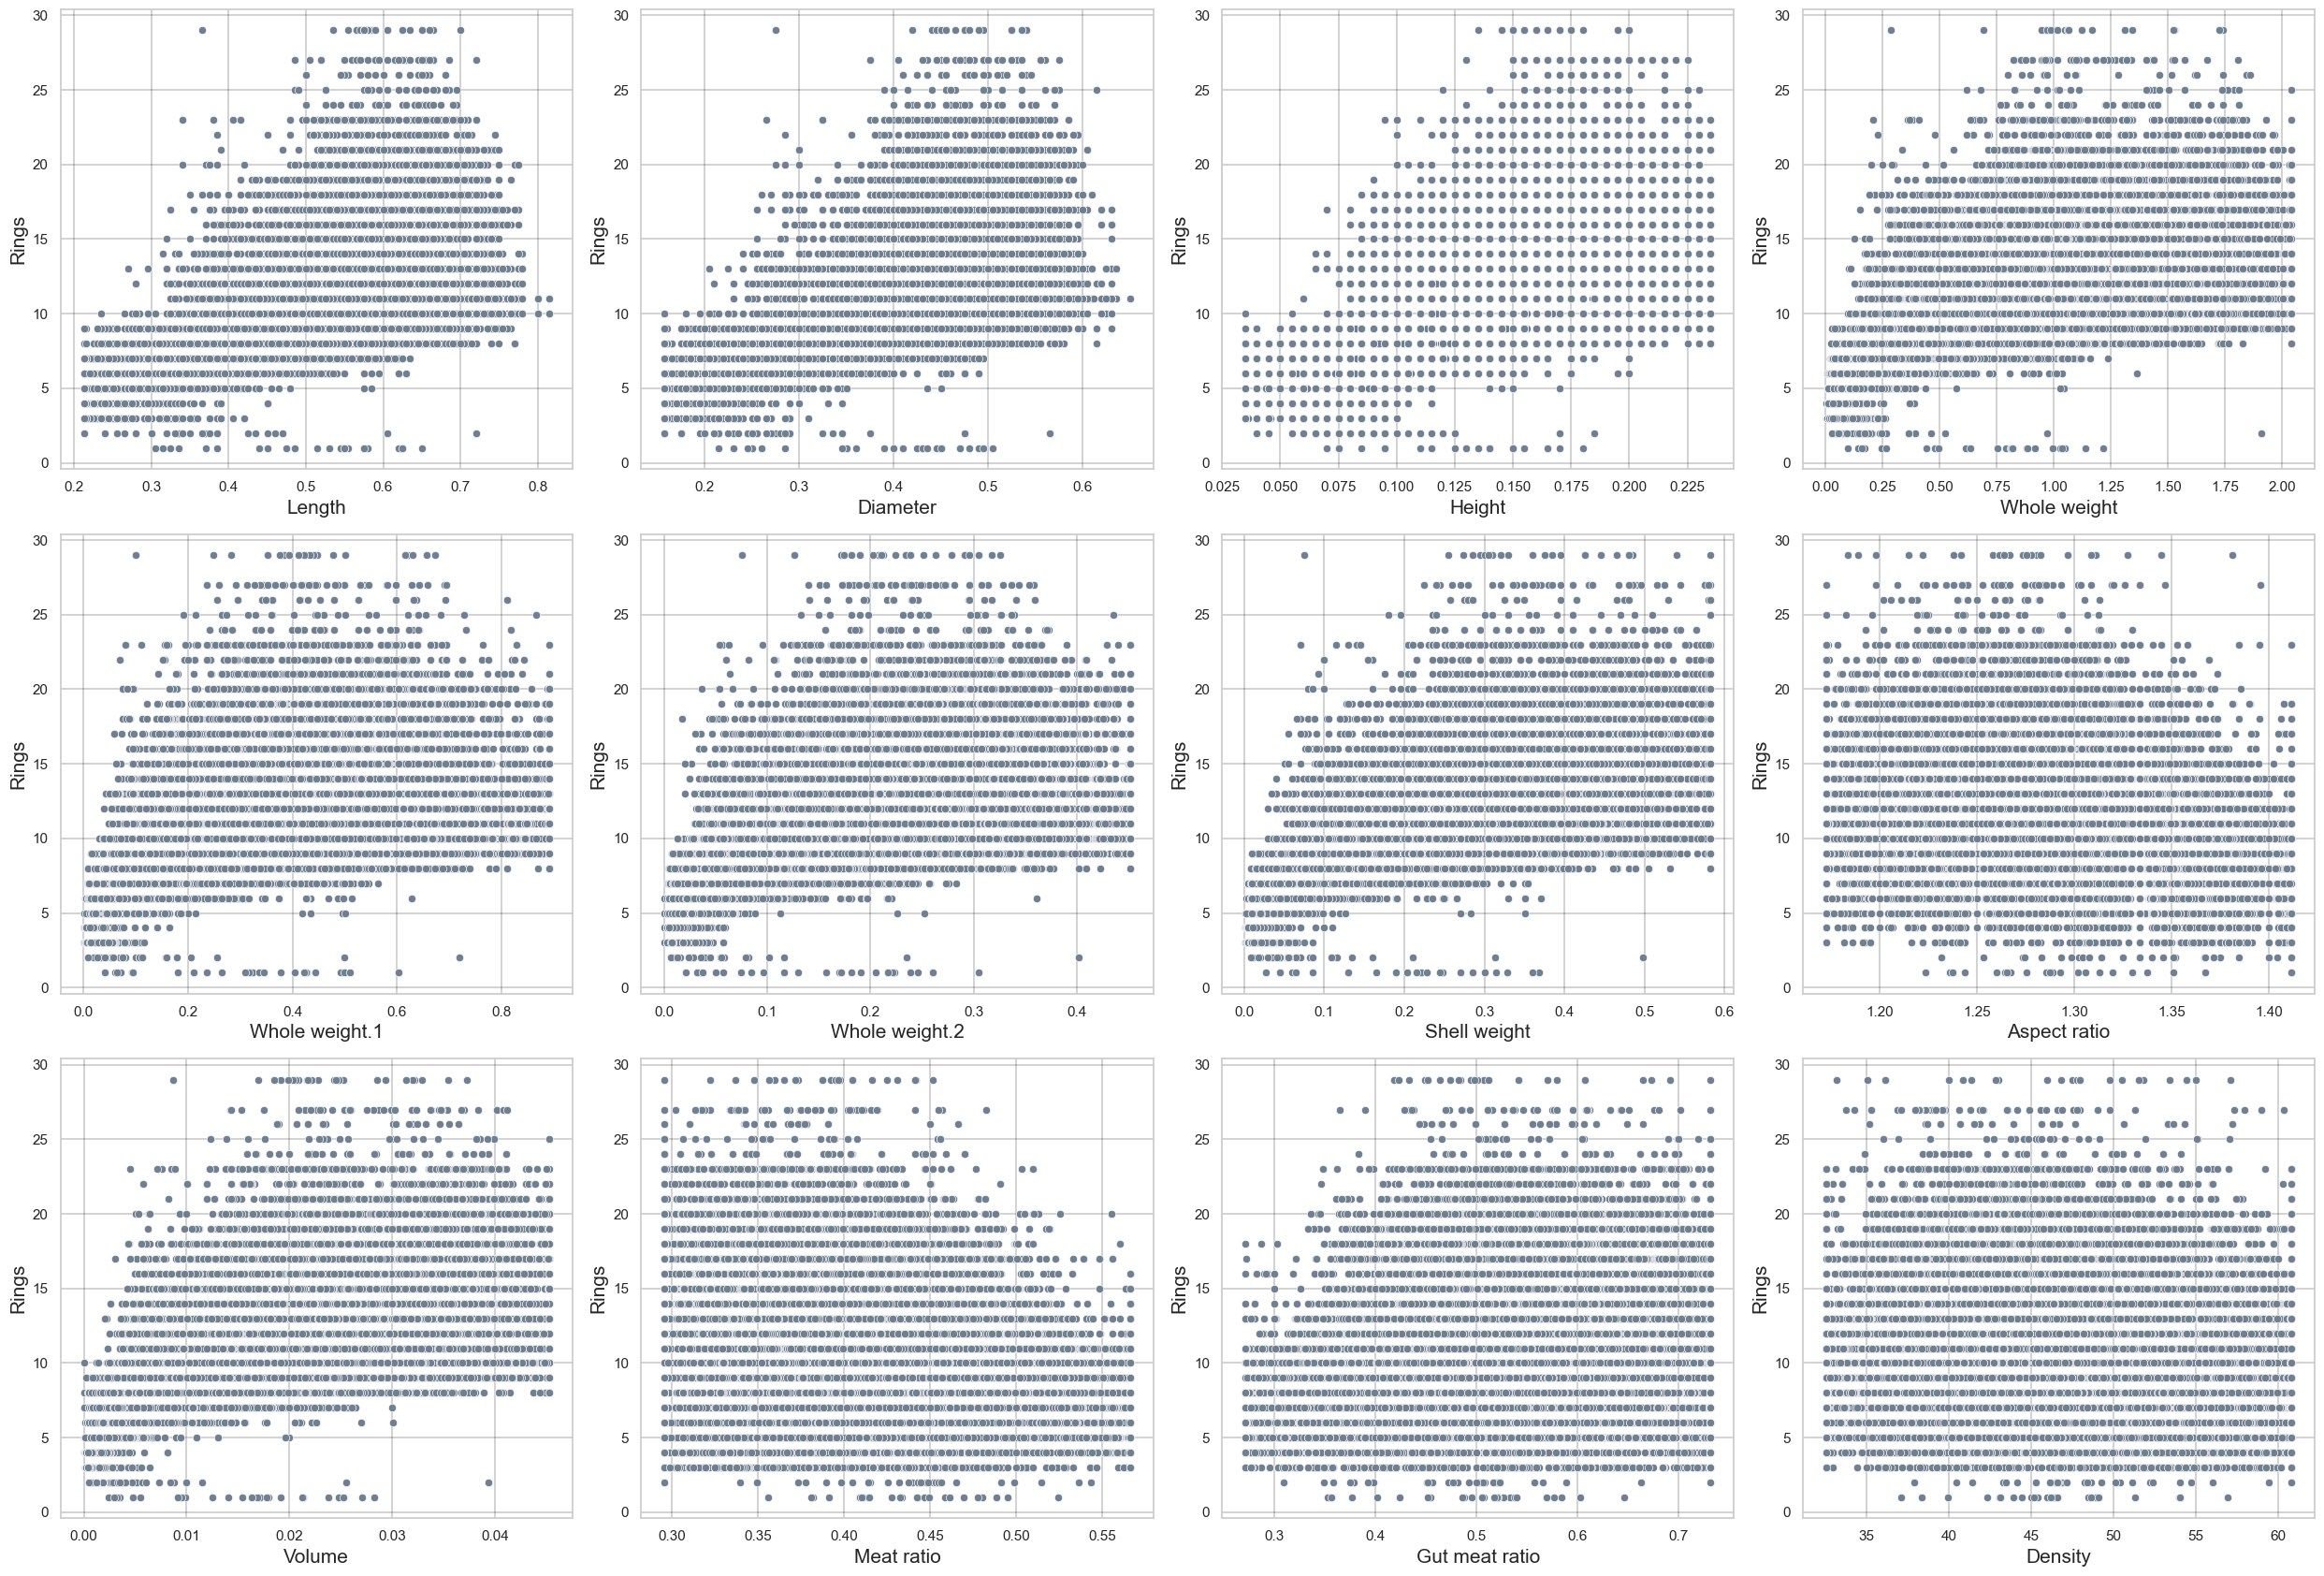

In [29]:
# Define a scatter plot function for numerical features
def MultiScatterplot(df, y,num_cols, f_cols=4, color='slategrey',hue=None):
    f_rows = np.ceil(len(num_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(num_cols):
        sns.scatterplot(x=j, y=y, data=df, ax=axes[i], color=color, hue=None)
        axes[i].set_facecolor('white')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        axes[i].set_xlabel(j).set_fontsize(15)
        axes[i].set_ylabel('Rings').set_fontsize(15)
        plt.tight_layout()

    # ignore the empty plots
    if len(num_cols) % f_cols != 0:
        for i in range(len(num_cols) % f_cols):
            fig.delaxes(axes[-1 - i]) 

# Plot the scatter plots
MultiScatterplot(df=train_wo_O, y=y, num_cols=num_cols)

##### c.II. Individual conditional expectation (ICE) Plots

An individual conditional expectation (ICE) plot shows the dependence between the target varaible and an input feature of interest, by first fitting them in an estimator, and produce predicted values of the target variable based on the change on a selected feature. By looking at the ICE plots, we may get the following insights:

1. Visualize Feature Effects:
- ICE plots allow you to visualize how changes in a single input feature affect the predicted outcome of your model. This is particularly useful for understanding non-linear relationships and interactions between features. If the lines are curved or have varying slopes, it indicates a non-linear relationship.
2. Individual vs. Global Effects:
- ICE plots show the prediction for each individual data point as the selected feature changes, providing a more granular view compared to Partial Dependence Plots (PDP) which show average effects across the dataset.
3. Identify Heterogeneity:
- By examining the different trajectories of individual lines in an ICE plot, you can identify whether the effect of the feature varies significantly across different data points. This helps in understanding model behavior and detecting interactions or conditional dependencies.
4. Check Model Consistency:
- Consistent patterns in ICE plots suggest that the model is treating instances in a similar manner, which can be a sign of a well-generalized model. Conversely, erratic patterns might indicate overfitting or model instability.
5. Feature Importance:
- ICE plots can help in identifying important features by showing how sensitive the model's predictions are to changes in the feature values. Features that cause significant changes in predictions are likely important. 
6. Engineering Features:
- Insights from ICE plots can guide feature engineering. For instance, if the plot indicates that certain ranges of the feature have different impacts, you might consider creating new features or bins.

<br> References:
<br> [1] https://christophm.github.io/interpretable-ml-book/pdp.html
<br> [2] https://scikit-learn.org/stable/modules/partial_dependence.html 
<br> [3] https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters
<br> [4] https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

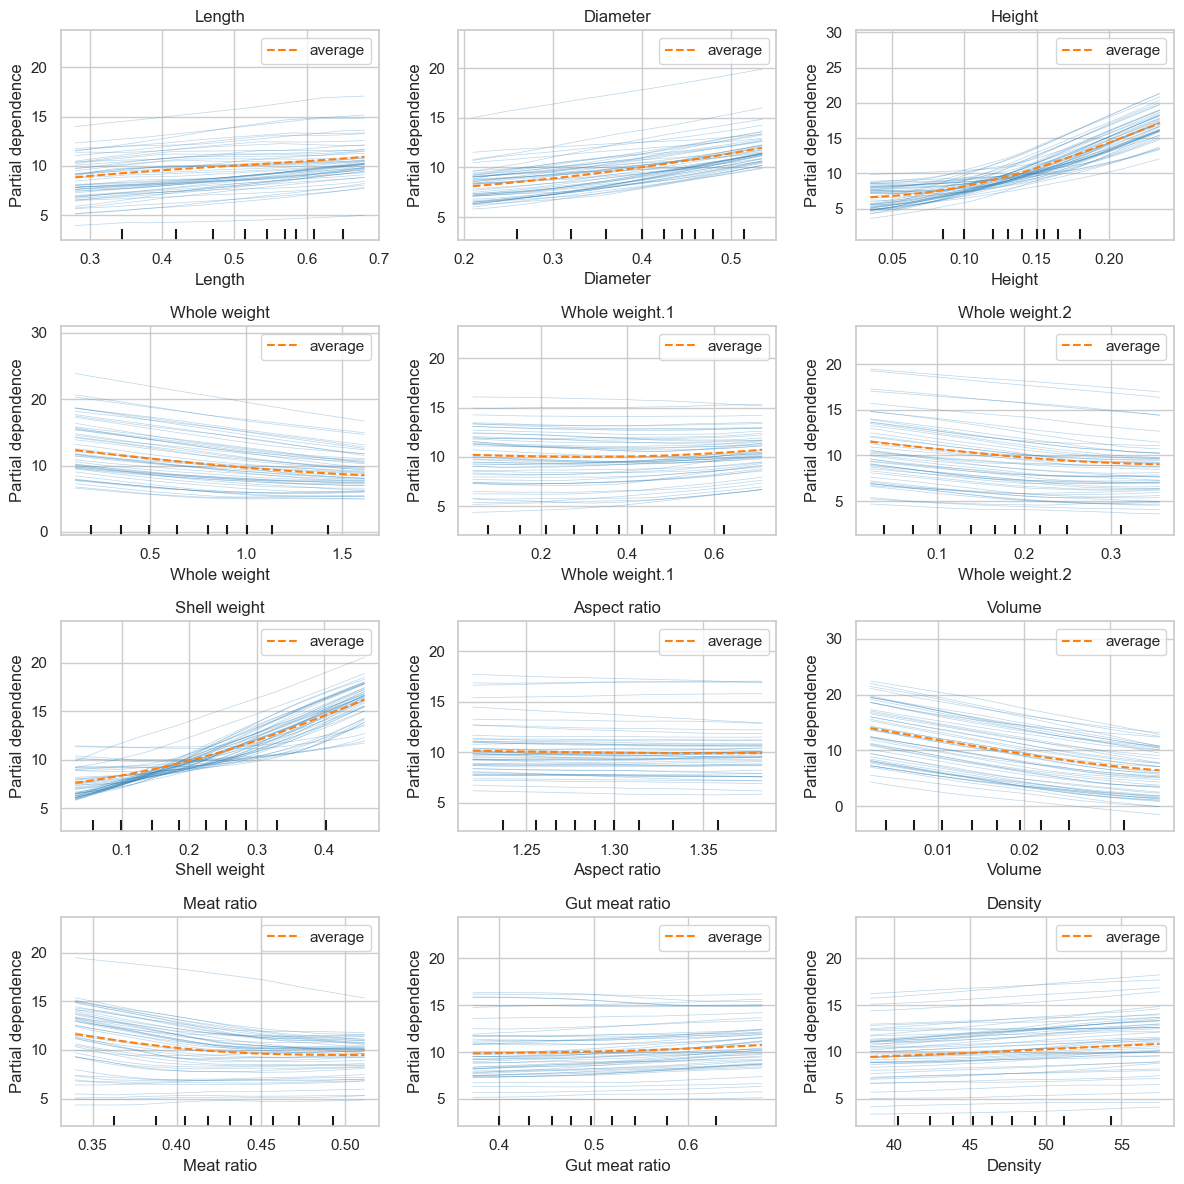

In [30]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
fig, axes = plt.subplots(4,3,figsize=(12, 12))
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)
mlp.fit(train_wo_O[num_cols], y)
for i, ax in enumerate(axes.flatten()):
    PartialDependenceDisplay.from_estimator(mlp, train_wo_O[num_cols], features=[i], ax=ax,kind='both', subsample=50)
    ax.set_title(num_cols[i])
plt.tight_layout()

### 7.3. Bivariate analysis: Numerical-numerical features

#### 7.3.1. Scatterplots

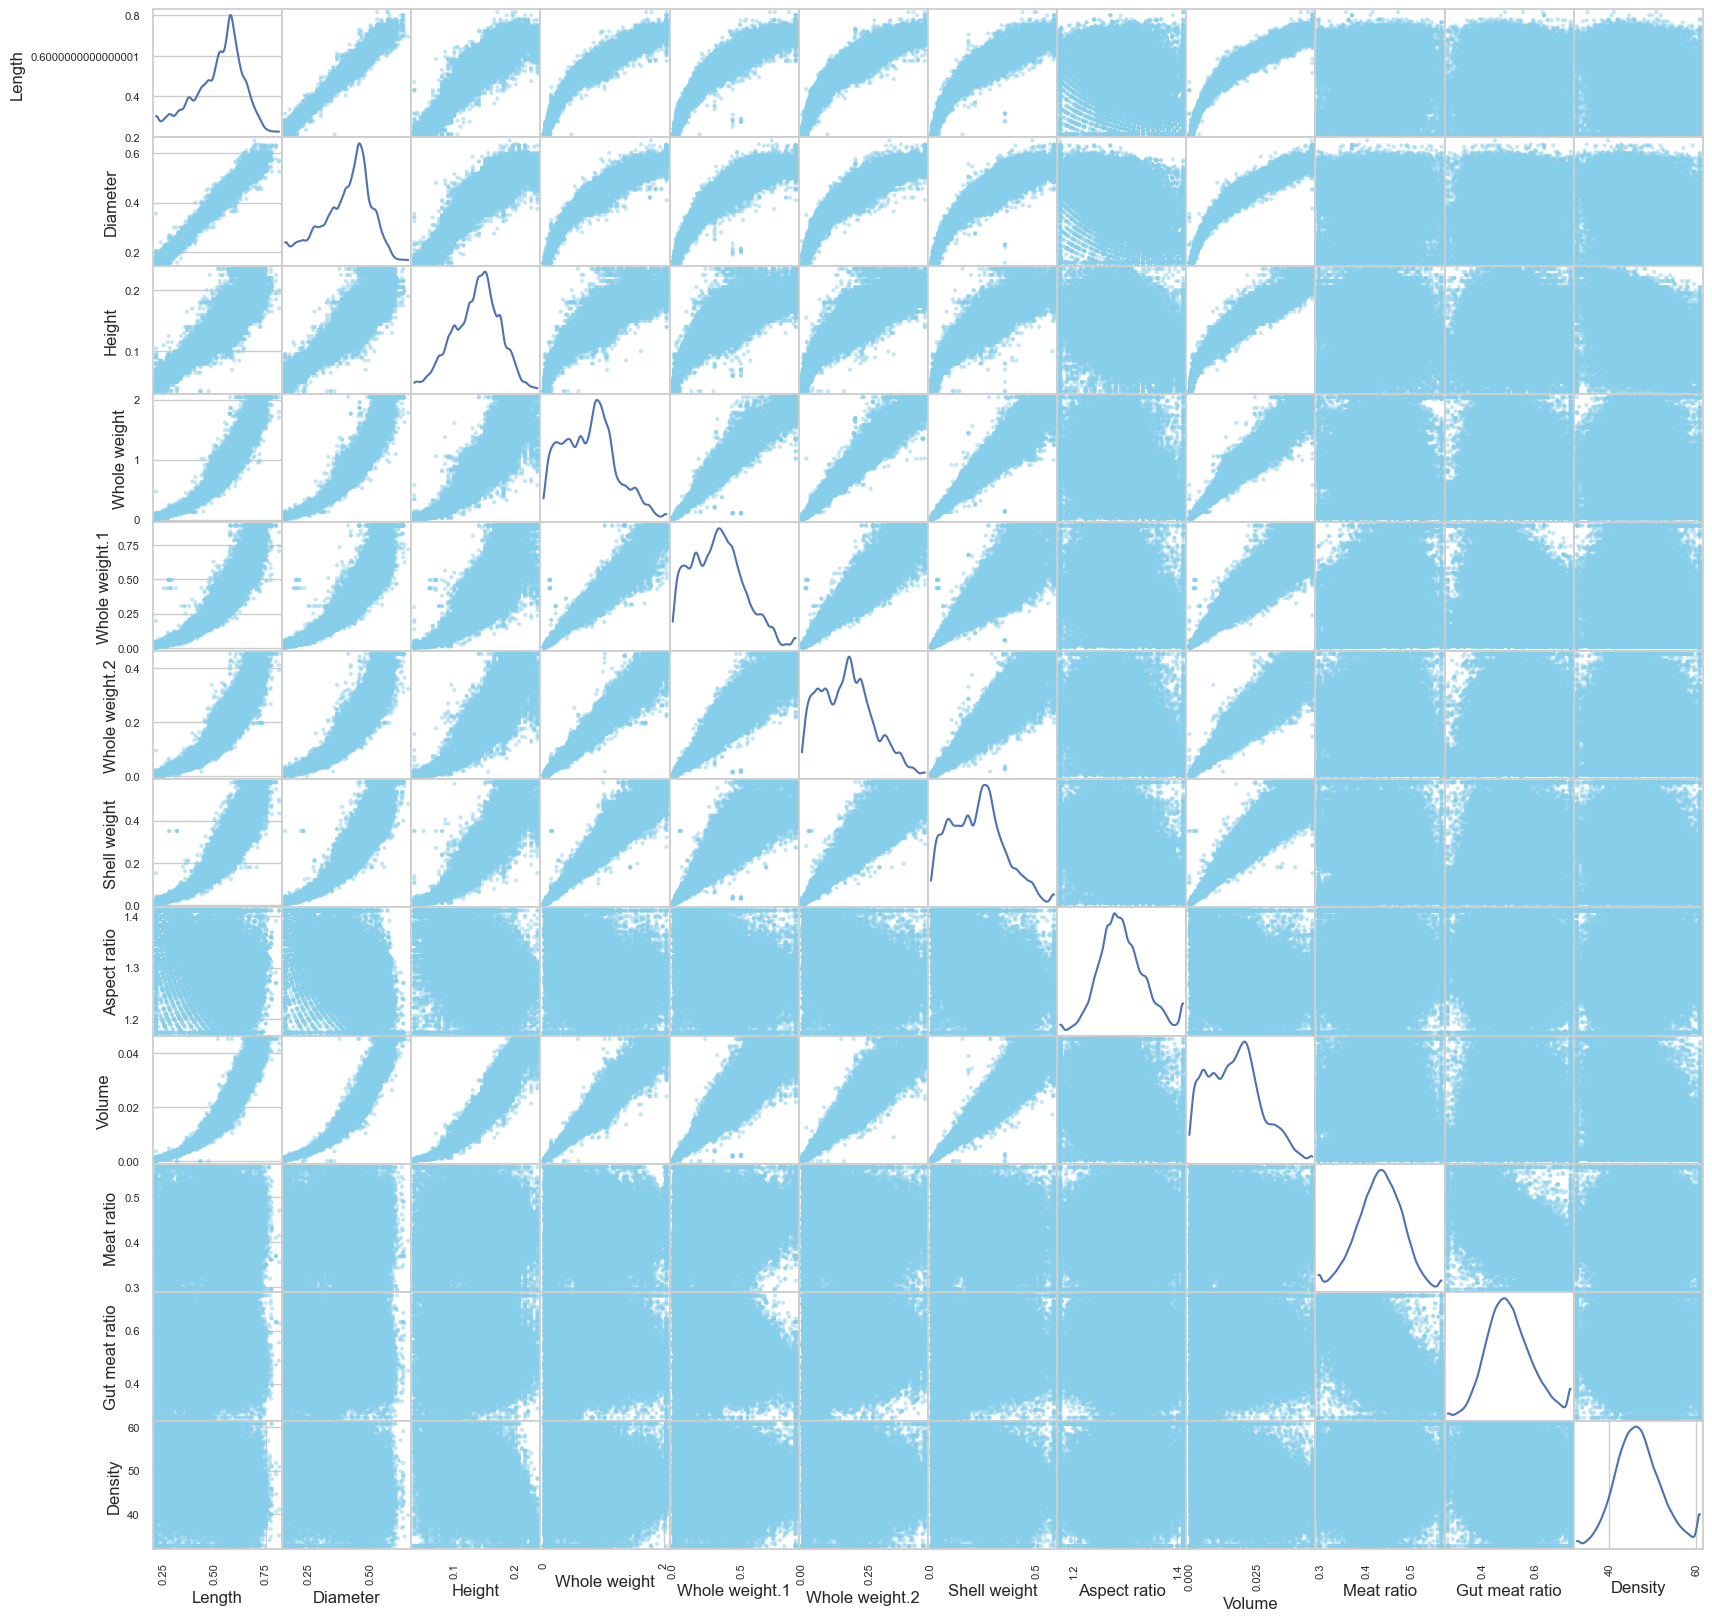

In [31]:
pd.plotting.scatter_matrix(train_wo_O[num_cols], diagonal="kde", figsize=(20, 20), color='skyblue')
plt.show()

#### 7.3.2. Correlation Matrix

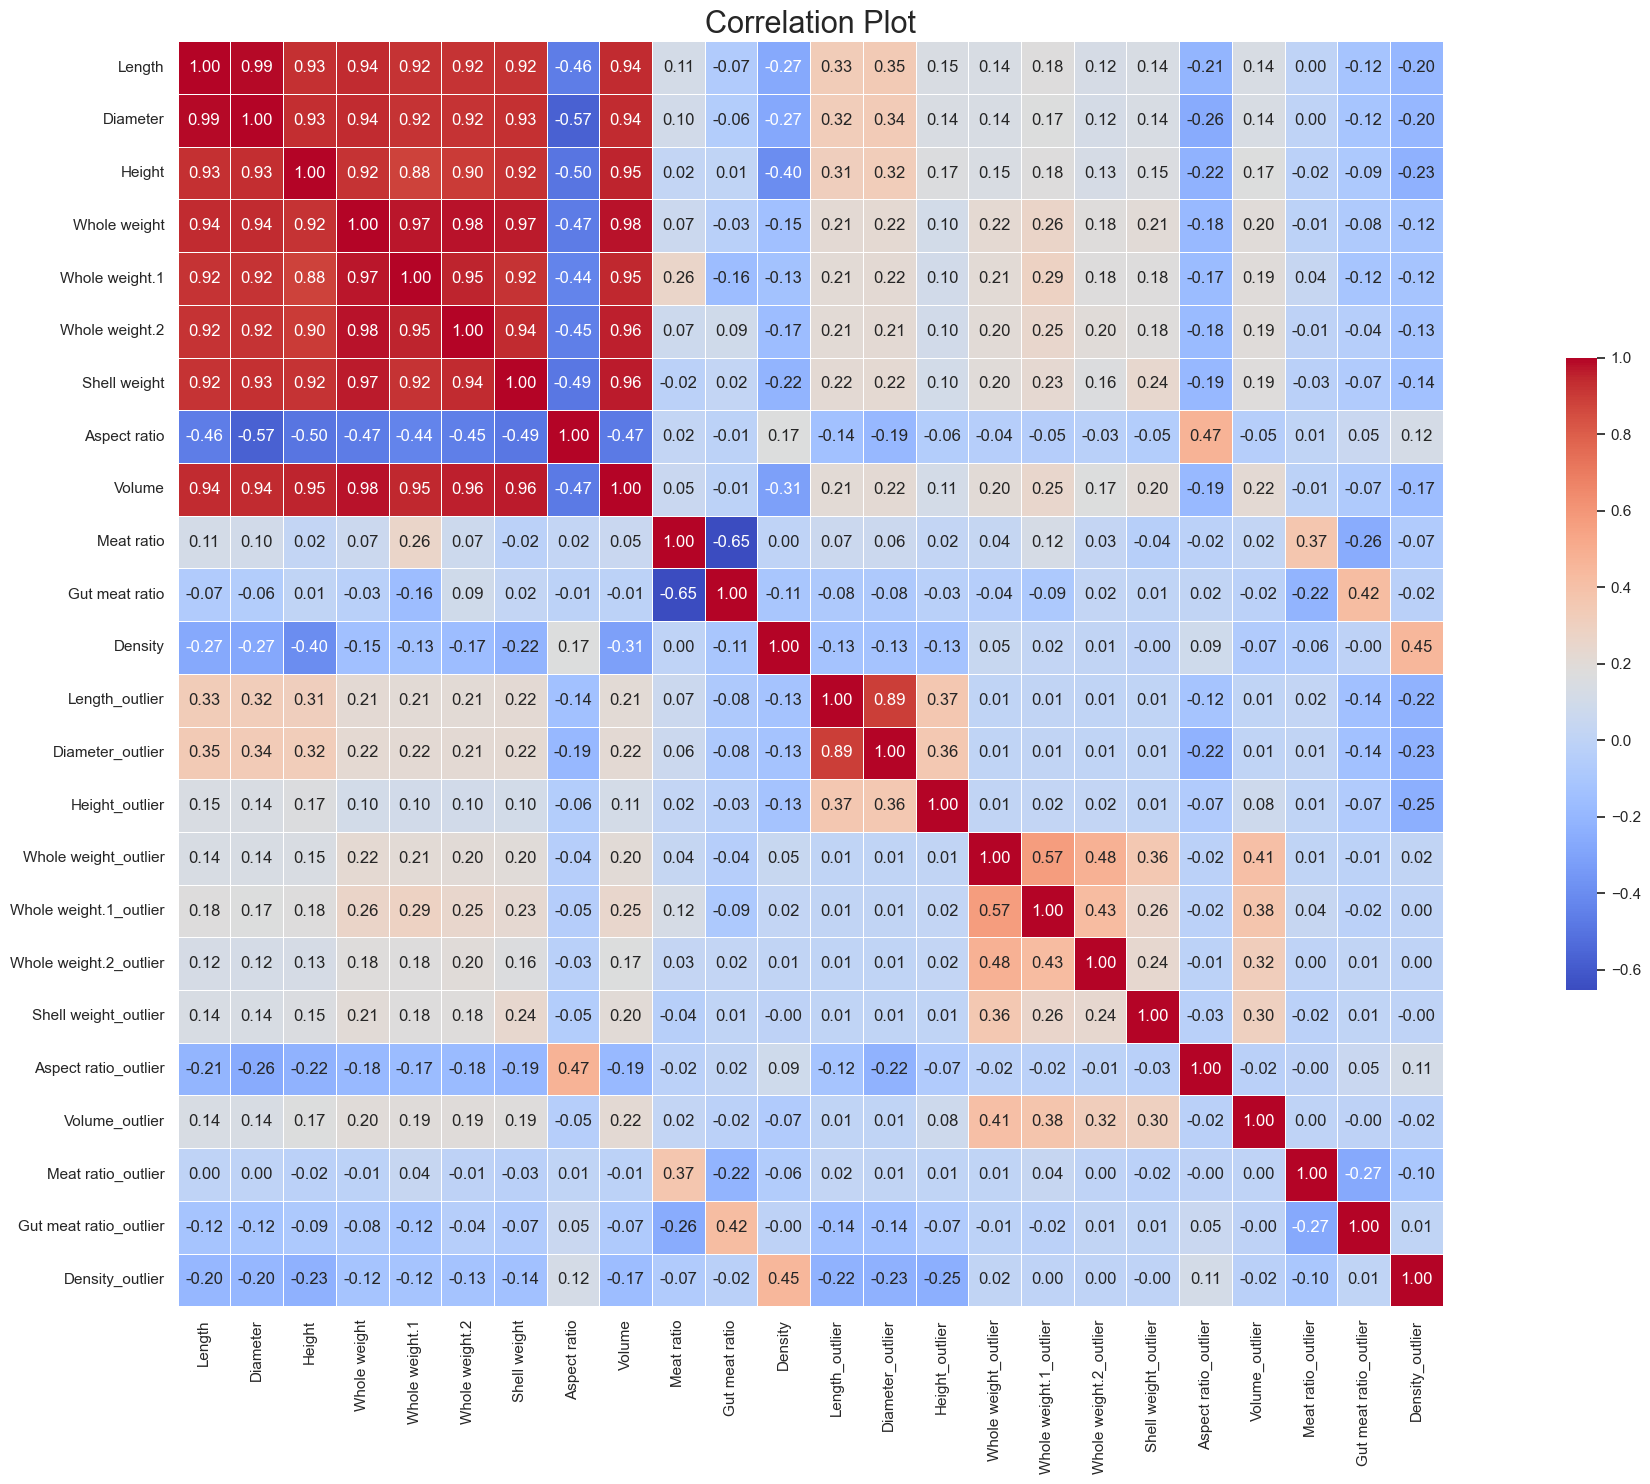

Length  Diameter    Height  Whole weight  \
Length                  1.000000  0.989795  0.927746      0.937902   
Diameter                0.989795  1.000000  0.931219      0.940094   
Height                  0.927746  0.931219  1.000000      0.916449   
Whole weight            0.937902  0.940094  0.916449      1.000000   
Whole weight.1          0.920102  0.918820  0.878620      0.972889   
Whole weight.2          0.919245  0.920594  0.899606      0.975290   
Shell weight            0.920264  0.926830  0.920789      0.967451   
Aspect ratio           -0.460329 -0.573124 -0.496905     -0.467532   
Volume                  0.936641  0.940743  0.950597      0.977026   
Meat ratio              0.114083  0.098886  0.023586      0.066683   
Gut meat ratio         -0.068803 -0.059002  0.005272     -0.033483   
Density                -0.268560 -0.273438 -0.399992     -0.146864   
Length_outlier          0.334208  0.321853  0.312647      0.212999   
Diameter_outlier        0.345011  0.336377  0.323344      0.221294   
Height_outlier          0.145690  0.141403  0.166316      0.102887   
Whole weight_outlier    0.140641  0.139434  0.145449      0.220002   
Whole weight.1_outlier  0.175753  0.172656  0.178574      0.263655   
Whole weight.2_outlier  0.121990  0.119811  0.125408      0.181879   
Shell weight_outlier    0.137297  0.138925  0.153858      0.205186   
Aspect ratio_outlier   -0.210786 -0.261947 -0.221503     -0.184072   
Volume_outlier          0.140325  0.140001  0.172807      0.196824   
Meat ratio_outlier      0.003850  0.000530 -0.016879     -0.013963   
Gut meat ratio_outlier -0.118777 -0.115775 -0.088114     -0.078079   
Density_outlier        -0.200619 -0.200922 -0.231123     -0.119902   

                        Whole weight.1  Whole weight.2  Shell weight  \
Length                        0.920102        0.919245      0.920264   
Diameter                      0.918820        0.920594      0.926830   
Height                        0.878620        0.899606      0.920789   
Whole weight                  0.972889        0.975290      0.967451   
Whole weight.1                1.000000        0.952005      0.918181   
Whole weight.2                0.952005        1.000000      0.941272   
Shell weight                  0.918181        0.941272      1.000000   
Aspect ratio                 -0.439584       -0.453979     -0.485933   
Volume                        0.947541        0.958380      0.963814   
Meat ratio                    0.258106        0.070571     -0.017935   
Gut meat ratio               -0.163029        0.090587      0.021343   
Density                      -0.132925       -0.165937     -0.216835   
Length_outlier                0.208414        0.206800      0.215075   
Diameter_outlier              0.216491        0.214930      0.223300   
Height_outlier                0.098842        0.100148      0.102543   
Whole weight_outlier          0.210241        0.203413      0.195583   
Whole weight.1_outlier        0.285150        0.249689      0.228600   
Whole weight.2_outlier        0.175475        0.196610      0.164373   
Shell weight_outlier          0.176308        0.184738      0.239899   
Aspect ratio_outlier         -0.174954       -0.178202     -0.191112   
Volume_outlier                0.188375        0.187452      0.185251   
Meat ratio_outlier            0.043836       -0.005977     -0.025279   
Gut meat ratio_outlier       -0.117072       -0.044351     -0.066887   
Density_outlier              -0.118567       -0.125285     -0.138671   

                        Aspect ratio    Volume  Meat ratio  ...  \
Length                     -0.460329  0.936641    0.114083  ...   
Diameter                   -0.573124  0.940743    0.098886  ...   
Height                     -0.496905  0.950597    0.023586  ...   
Whole weight               -0.467532  0.977026    0.066683  ...   
Whole weight.1             -0.439584  0.947541    0.258106  ...   
Whole weight.2             -0.453979  0.958380    0.070571  ...   
Shell

In [32]:
# Compute the correlation matrix
correlation_matrix = train_wo_O[train_wo_O._get_numeric_data().columns.tolist()].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm', square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Plot', fontsize=22)  
plt.tight_layout()  
plt.show()

# Display the correlation matrix
correlation_matrix

> Suprisingly the Aspect ratio has a negative correlation with the Length of the abalone, it is possible that when abalone grows, it becomes rounder and thus a decreased aspect ratio. to inspect the relation between the aspect ratio and the length, a scatter plot is plotted.

#### 7.4 Conclusion from the bivariate analysis



## 8. Multivariate Analysis:

<b> Step Objectives</b>

- to analyze the joint distribution of features and the target variable, such as the effect of a categorial feature on their interactions

- to use techniques like principal component analysis (PCA) or t-SNE to identify patterns and reduce dimensionality.

### 8.1. Scatter plots marked with categorial feature 

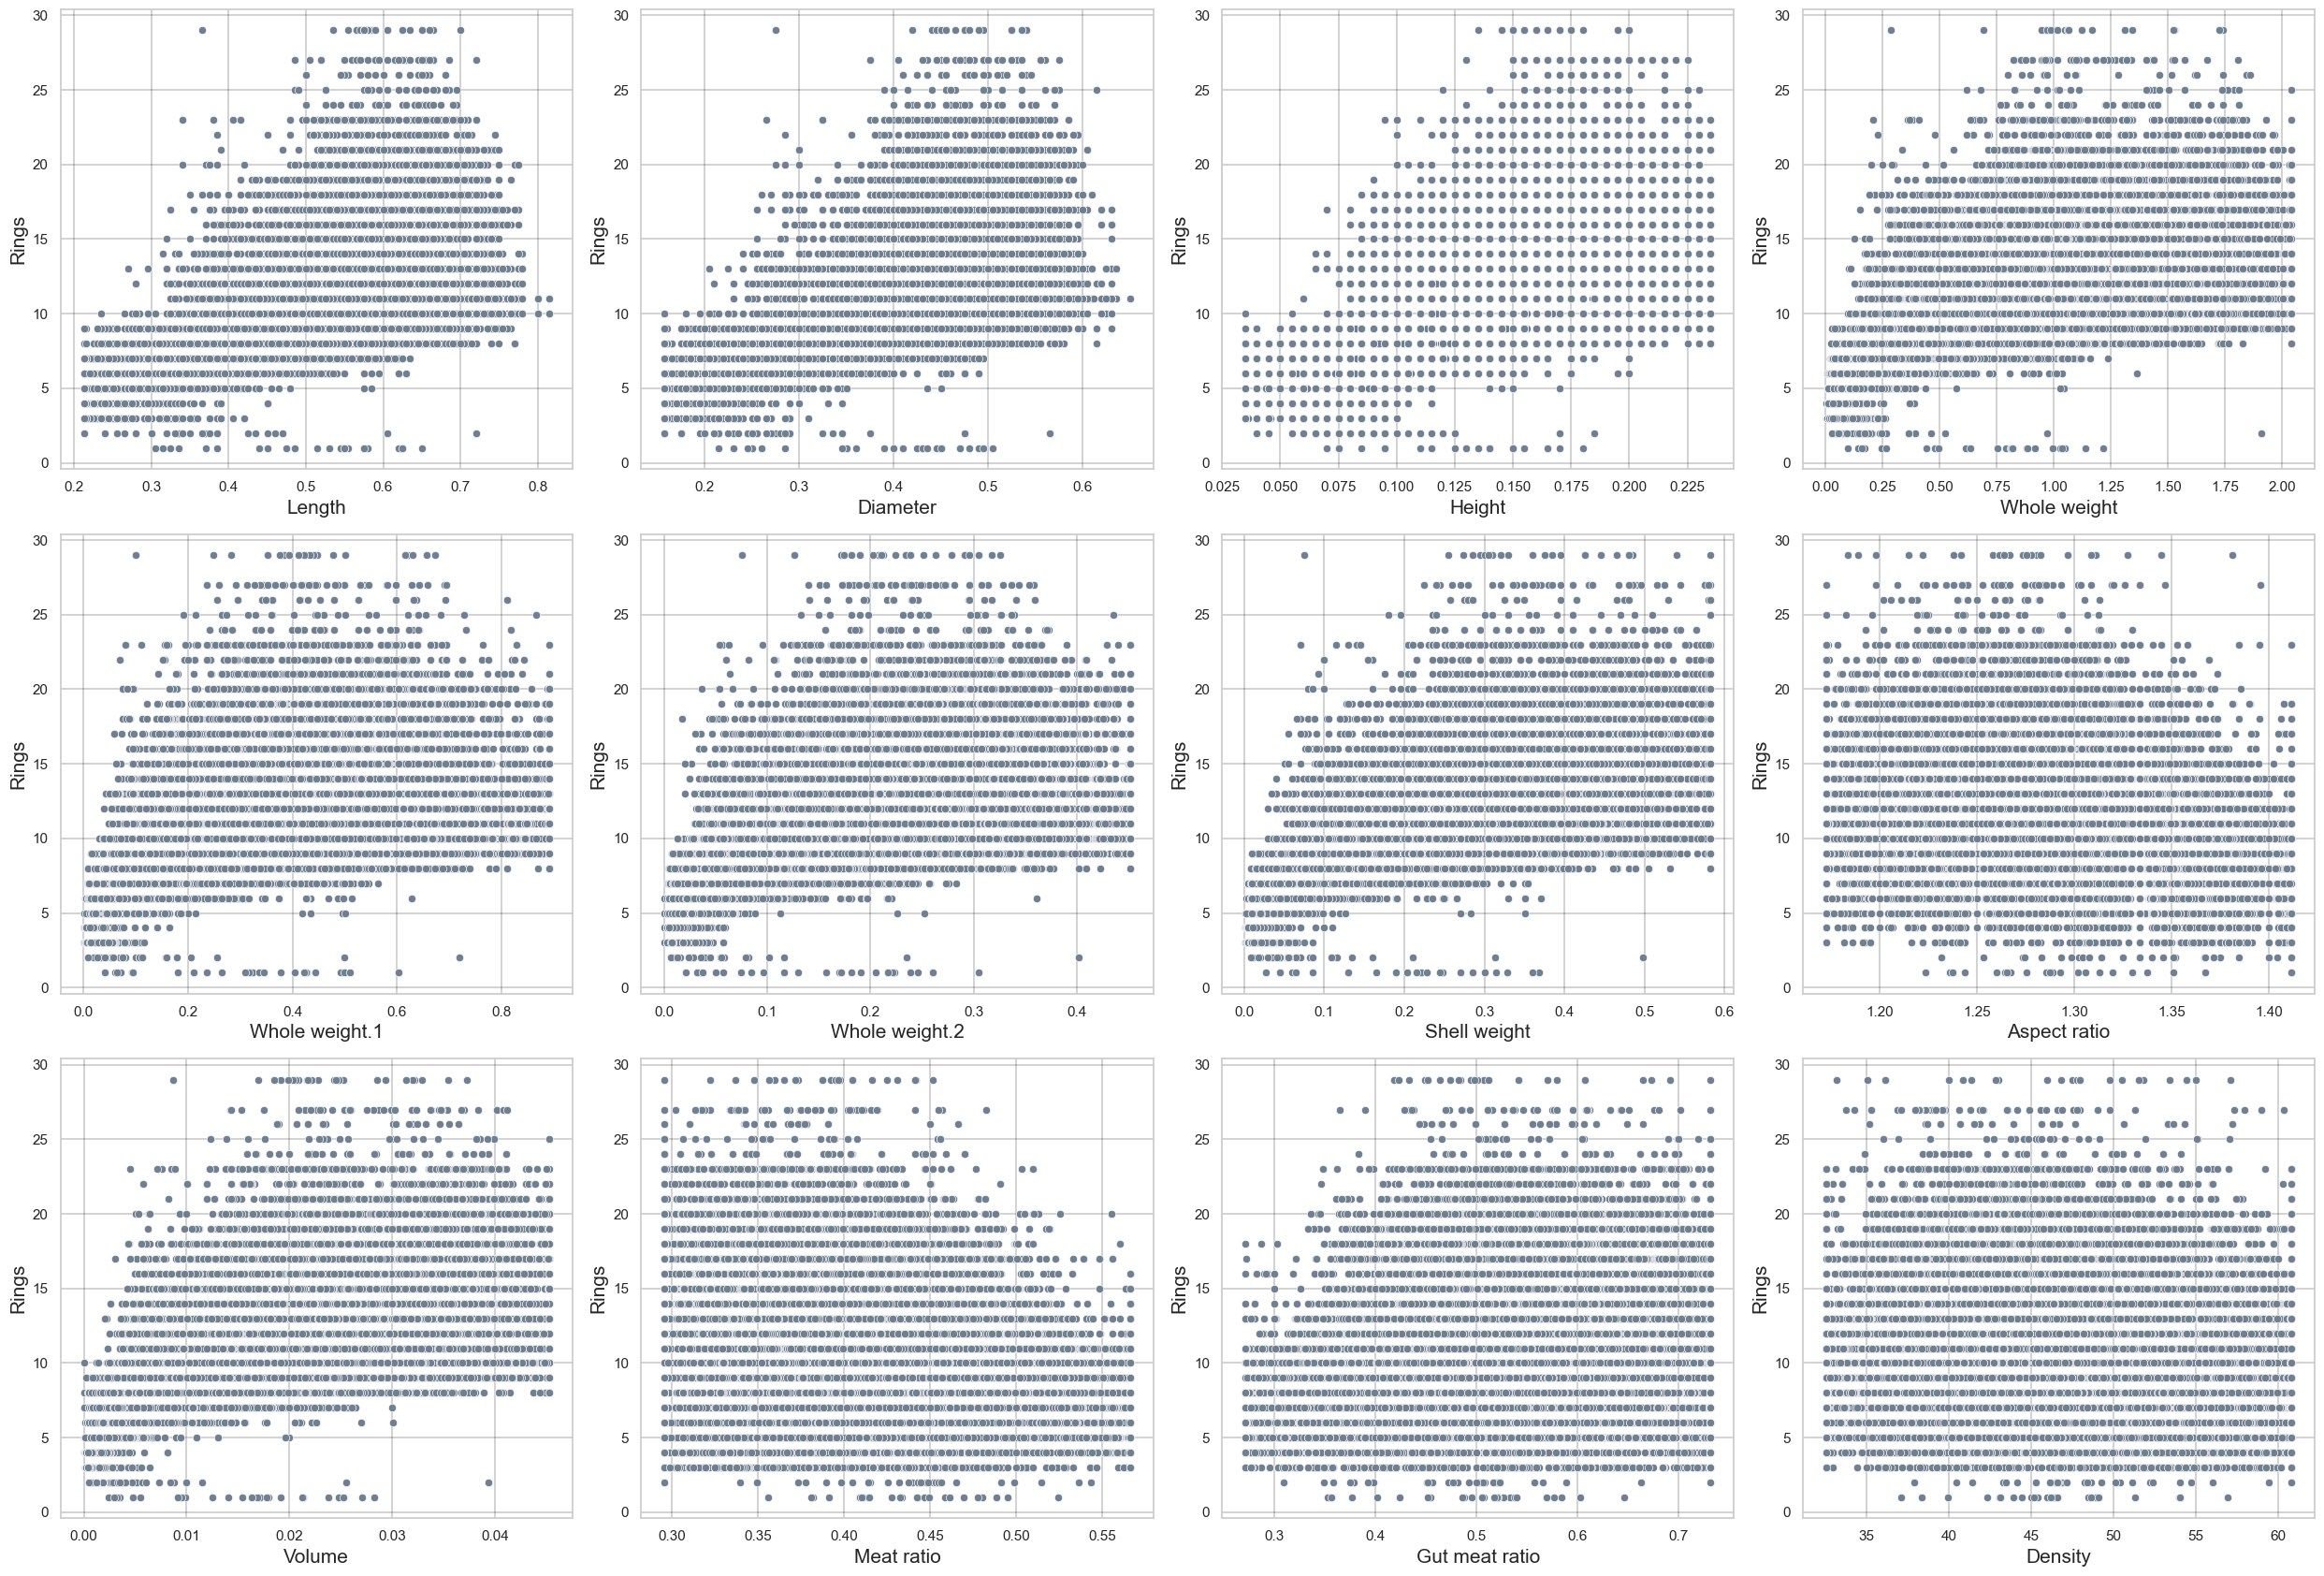

In [33]:
# Plot the scatter plot of numerical features
MultiScatterplot(train_wo_O,y, num_cols=num_cols, hue='Sex')

### 8.2. Investigation of categorial features effect on numerical-numerical features interaction:

<Axes: xlabel='Length', ylabel='Aspect ratio'>

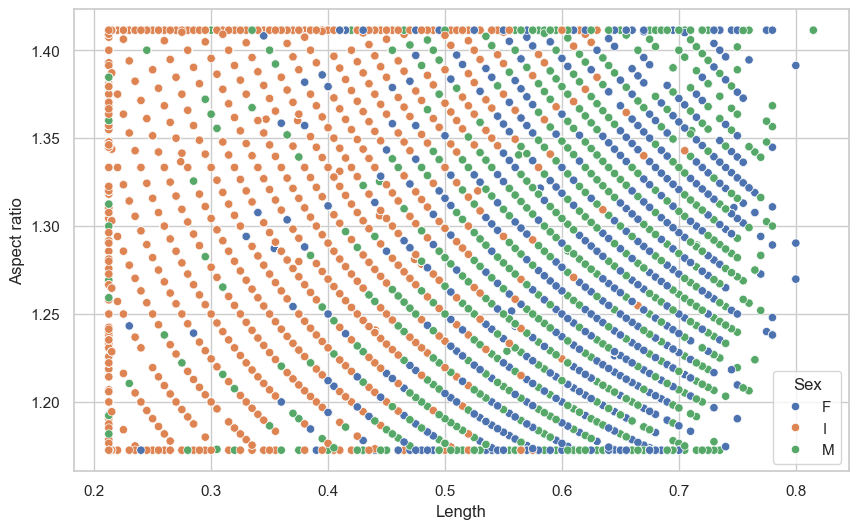

In [34]:
# scatter plot of aspect ratio v.s. length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Aspect ratio', data=train_wo_O, color='skyblue', hue='Sex')

## 9. Feature preprocessing 

> Make a Feature preprocessing and selection pipeline here

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# visualizing pipeline
set_config(display='diagram')

# Define a function to preprocess the data
def PreprocessData(df,y):

    # Define the numerical and categorical features
    num_features = df._get_numeric_data().columns
    cat_features = list(set(df.columns) - set(num_features))

    # Set up the numerical and categorical transformers
    numeric_transformer = Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]
    )
    categorial_transformer = Pipeline(
    steps=[("imputation_mode",SimpleImputer(missing_values=np.nan,strategy="most_frequent")),('onehot',OneHotEncoder(handle_unknown='ignore'))]
    )
    # Set up the preprocessor
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorial_transformer, cat_features)
    ])

    # Fit and transform the data
    df = preprocessor.fit_transform(df)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

    # Return the preprocessed data
    return X_train, X_test, y_train, y_test, preprocessor


In [36]:
# Preprocess the feature-engineered data
X_train, X_test, y_train, y_test, preprocessor = PreprocessData(train_wo_O,y)




## 10. Feature Selection

<b>Step Objectives</b>
- to choose a set of <b>"valuable"</b> features, preferrabily independent to each other, for training the models. 

There are several ways to measure how "valuable" a feature is. These include: 

1. Computing the variance of a feature: 
- features that do not change much, i.e. with small variances, <b>(note that it is the relative variance)</b>, implies them containing little information and can be discarded.
    - Handling method: sklearn.feature_selection.VarianceThreshold

2. Computing the relationship of a feature with the target variable
- the relationship between a selected feature and the target variable can be described by different desciptors, such as the correlation coefficient and mutual information. 
- a feature that is not related to the target variable is considered as not "valuable for training".
    - Handling method: sklearn.feature_selection.SelectKBest

3. Select features with some baseline models
- This method adopt some baseline model for feature evaluation. The spirit of this method is if features are clearly useless in a simple model, there is no need to drag them to a more complex one. The models used in this methods include a tree-like model and a linear model with Lasso regularization so that it is prone to nullify weights of weak features.
    - Regularization: Main regularization methods are:
        - Lasso regularization 
        - Ridge regularization 
        - Elastic net regularization.
    - Tree-based methods: 
        - LightGBM 
        - XGBoost
    - Handling method: sklearn.model_selection.cross_val_score

4. Grid Search
- This method trains a model based on a subset of features with different composition of feature sets, store the scores and repeat for different subsets to find the subsets reporting the best scores.
- there are two types of grid search used in feature selection:
    - 1. the Exhaustive Feature Selection, which iterate through all combinations. 
    - 2. the Sequential Feature Selection, which continuously add or remove features from a feature set until either we have selected a specified number of features, or the quality of model ceases to improve. This type of selection can be further classified into forward or backward selection method. [3-4]
    - Handling method: sklearn.feature_selection.SequentialFeatureSelector

<br>References: 
<br> [1] https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py 
<br> [2] https://johfischer.com/2021/08/06/correlation-based-feature-selection-in-python-from-scratch/ 
<br> [3] https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
<br> [4] https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a 
<br> [5] https://www.youtube.com/watch?v=LTE7YbRexl8 

> the feature selection pipline should involve a filter that remove highly correlated features, and then a SFS or RFS

> Rule of thumbs of correlation:
    - 0.0 - 0.19: Very weak
    - 0.2 - 0.39: Weak
    - 0.4 - 0.59: Moderate
    - 0.6 - 0.79: Strong
    - 0.8 - 1.0:  Very Strong


In [37]:
# Use a sequential back selection to select the most important features
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

# Define a function for selecting the most important features by backward sequential selection
def SelectFeatures(X_train, y_train, preprocessor):
    # Initialize the estimator model
    xgb=XGBRegressor()

    # Fit the model
    xgb.fit(X_train, y_train)

    # Get the feature names
    feature_names =preprocessor.transformers_[0][2].tolist()+preprocessor.transformers_[1][1]['onehot'].get_feature_names_out().tolist()

    # Initialize the SequentialFeatureSelector
    sfs_backward = SequentialFeatureSelector(
        xgb, n_features_to_select=15, direction="backward"
    ).fit(X_train, y_train)

    # Convert feature_names to a NumPy array
    feature_names = np.array(feature_names)
    
    # Use the boolean mask to index the NumPy array
    selected_features = feature_names[sfs_backward.get_support()]

    print(
    "Features selected by backward sequential selection: "
    f"{selected_features}"
    )

    # Return the selected features
    return feature_names[sfs_backward.get_support()], sfs_backward

# Select the most important features
important_features,sfs_backward = SelectFeatures(X_train, y_train, preprocessor)

# Display the selected features
important_features



Features selected by backward sequential selection: ['Length' 'Diameter' 'Height' 'Whole weight' 'Whole weight.1'
 'Shell weight' 'Meat ratio' 'Gut meat ratio' 'Height_outlier'
 'Aspect ratio_outlier' 'Meat ratio_outlier' 'Gut meat ratio_outlier'
 'Density_outlier' 'x0_F' 'x0_I']


array(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Shell weight', 'Meat ratio', 'Gut meat ratio', 'Height_outlier',
       'Aspect ratio_outlier', 'Meat ratio_outlier',
       'Gut meat ratio_outlier', 'Density_outlier', 'x0_F', 'x0_I'],
      dtype='<U22')

In [38]:
# Keep only the selected features
X_train = X_train[:, sfs_backward.get_support()]
X_test = X_test[:, sfs_backward.get_support()]

## 11. Model training and hyperparameter tuning

### 11.1 Define an model evaluation function

In [39]:
def evaluate_model(true, predicted):
    # mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    # rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    rmsle = root_mean_squared_log_error(true, predicted)
    return r2_square,rmsle 

### 11.2 Define models:
From the datatype of the features, select a suitable models. 
Classifier v.s. regressor 
#### 11.2.1. Models

In [40]:
# create a utility function to sort the dictionary by values aphabatically
def sort_dict(d):
    return dict(sorted(d.items(), key=lambda x: x[0]))

# Define a list of models for prediction
models = {
    "Linear Regression": LinearRegression(),
    #"Lasso": Lasso(),
    #"SVR": SVR(),
    #"K-Neighbors Regressor": KNeighborsRegressor(),
    #"Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    #"AdaBoost Regressor": AdaBoostRegressor(),
    #"LightGBM": lgb.LGBMRegressor(),
    'DummyRegressor': DummyRegressor(strategy='mean') # DummyRegressor is added for sanity check
}

# Sort the models
models=sort_dict(models)

##### 11.2.2. Model parameters

In [41]:
# Define the parameters for the hyperparamter tuning of models by RandomizedSearchCV
import scipy.stats as stats
params={

    # "Decision Tree":{
    #       'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    #       # 'splitter':['best','random'],
    #       # 'max_features':['sqrt','log2'],  
    # },
     
     "Random Forest Regressor":{
         # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         # 'max_features':['sqrt','log2',None],
         'n_estimators': [8,16,32,64,128,256]
     },

                    
    #  "Gradient Boosting":{
    #       # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
    #       'learning_rate':[.1,.01,.05,.001],
    #       'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
    #       # 'criterion':['squared_error', 'friedman_mse'],
    #       # 'max_features':['auto','sqrt','log2'],
    #       'n_estimators': [8,16,32,64,128,256]
    #  },

     "Linear Regression":{},

     "XGBRegressor":{
        'booster': ['gbtree','dart'],
        'reg_alpha': stats.uniform(0, 1),
        'learning_rate':stats.loguniform(1e-2, 1e-1),
        'n_estimators': [8,16,32,64,128,256]
     },

     "CatBoosting Regressor":{
         'depth': [6,8,10],
          'learning_rate': stats.loguniform(1e-2, 1e-1),
          'iterations': [30, 50, 100]
     },

    #  "AdaBoost Regressor":{
    #       'learning_rate':[.1,.01,0.5,.001],
    #       # 'loss':['linear','square','exponential'],
    #       'n_estimators': [8,16,32,64,128,256]
    #  },
            
     "Extra Trees Regressor":{
          # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          # 'max_features':['sqrt','log2',None],
          'n_estimators': [8,16,32,64,128,256]
     },

    #  "K-Neighbors Regressor":{
    #     'n_neighbors': [3,5,7,9],
    #     'weights': ['uniform','distance'],
    #     'algorithm': ['auto','ball_tree','kd_tree','brute']
    # },
                
    # "Lasso":{
    #     'alpha': [0.1,0.5,1.0,1.5],
    #     'selection': ['cyclic','random']
    # },

    # "SVR":{
    #     'kernel': ['linear','poly','rbf','sigmoid'],
    #     'C': [0.1,1,10,100,1000],
    #     'gamma': ['scale','auto']
    # },

    "DummyRegressor":{}

}

# Sort the parameters
params = sort_dict(params)

### 11.3. Model training and hyperparameters tuning

#### 11.3.1. Setup scoring method for the model optimization

In [42]:
from sklearn.metrics import make_scorer

# Define a custom cost function for the RandomizedSearchCV

def rmsle(y_true, y_pred):
    rmsle= root_mean_squared_log_error(y_true, y_pred)
    return rmsle

#### 11.3.2. Training models and hyperparameter tuning

> Note that we use K-fold as a cross-validators in this regression problem. 

<br> The variant of K-fold, stratified k-fold, comparing with the ordinary K-fold, will contain approximately the same percentage of samples of each target class as the complete set and are preferred in classification problem.

There are other possible cross-validators in the scikit-learn library. See [1] for more information.

The cross-validation can be implemented in a nested or non-nested form. It is preferred to use a nested-CV instead of non-nested CV, as nested-CV is less susceptible to overfitting.[2-4]

<br> References: 
<br> [1] Section 3.1.2.1.1.: https://scikit-learn.org/stable/modules/cross_validation.html 
<br> [2] https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py 
<br> [3] https://stats.stackexchange.com/questions/178174/when-is-nested-cross-validation-really-needed-and-can-make-a-practical-differenc 
<br> [4] https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/
<br> [5] https://medium.com/@cd_24/a-guide-to-nested-cross-validation-with-code-step-by-step-6a8ad06d5af2

In [43]:
from sklearn.model_selection import KFold

# Setup the KFold

SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS,shuffle=True, random_state=SEED)

> Note that we adopted a RandomizedSearchCV method for the hyperparameter tuning. Details can be found in [1].

As RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values, the parameters given to the search is better written in a form of distribution, instead of a list of parameter values as is in GridSearchCV.

The list of methods of hyperparameter optimization:
1. Random Search
2. Grid Search
3. Having Radom/Grid Search
4. Automated hyperparameter tuning
    - Bayesian optimization
    - Genetic algorithum
5. Artificial Neural Network Tuning
6. HyperOpt-Sklearn 
7. Bayes Search

<br> Reference:
<br> [1] https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py
<br> [2]https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/
<br> [3]https://www.tensorflow.org/decision_forests/tutorials/automatic_tuning_colab

In [44]:
from time import time
# Define a function for initiating empty lists for storing the model parameters and the scores
def model_evaluation(models, params, X_train, y_train, X_test, y_test, kf):
    model_list = []
    r2_train_list =[]
    r2_test_list = []
    rmsle_train_list =[]
    rmsle_test_list = []
    time_list =[]
    for i in range(len(list(models))):
        try:
            model = list(models.values())[i]
            para=params[list(models.keys())[i]]
            # implement a nested cross-validation
            start=time()
            RS = RandomizedSearchCV(model, para, n_iter=10, cv=kf, scoring=make_scorer(rmsle, greater_is_better=False), n_jobs=-1, verbose=1)
            RS.fit(X_train, y_train) # Train model
            time_list.append(time()-start)
            model.set_params(**RS.best_params_)
            model.fit(X_train, y_train)

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
        
            # Evaluate Train and Test dataset
            r2_train, rmsle_train = evaluate_model(y_train, y_train_pred)

            r2_test, rmsle_test = evaluate_model(y_test, y_test_pred)
        
            print(list(models.keys())[i])
            model_list.append(list(models.keys())[i])
            r2_train_list.append(r2_train)
            r2_test_list.append(r2_test)
            rmsle_train_list.append(rmsle_train)
            rmsle_test_list.append(rmsle_test)

        except Exception as e:
            print('Model failed:', e)
            print('='*35)
            print('\n')
            continue

    return model_list, r2_train_list, r2_test_list, rmsle_train_list, rmsle_test_list, time_list


In [45]:
# Preprocess the clean data
X_clean_train, X_clean_test, y_clean_train, y_clean_test, preprocessor_clean = PreprocessData(train_df_clean,y)

# Baseline scores with the clean data
model_list_clean, r2_train_list_clean, r2_test_list_clean, rmsle_train_list_clean, rmsle_test_list_clean, time_list_clean = model_evaluation(models, params, X_clean_train, y_clean_train, X_clean_test, y_clean_test, kf)

# Display the baseline scores
pd.DataFrame(list(zip(model_list_clean,time_list_clean, r2_train_list_clean,r2_test_list_clean,rmsle_train_list_clean,rmsle_test_list_clean)), columns=['Model Name','Compute time', 'r2_Score_Train','r2_Score_test','RMSLE_Score_Train','RMSLE_Score_Test']).sort_values(by=["RMSLE_Score_Train"],ascending=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CatBoosting Regressor
Fitting 5 folds for each of 1 candidates, totalling 5 fits
DummyRegressor
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Extra Trees Regressor
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Model failed: Root Mean Squared Logarithmic Error cannot be used when targets contain negative values.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Regressor
Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBRegressor


Model Name  Compute time  r2_Score_Train  r2_Score_test  \
2    Extra Trees Regressor    104.987436        1.000000   6.488435e-01   
3  Random Forest Regressor      0.336646        0.952344   6.510129e-01   
4             XGBRegressor    193.467320        0.735821   6.603579e-01   
0    CatBoosting Regressor     38.806236        0.647942   6.350673e-01   
1           DummyRegressor      0.164672        0.000000  -2.449884e-07   

   RMSLE_Score_Train  RMSLE_Score_Test  
2           0.000000          0.155485  
3           0.058102          0.155108  
4           0.137009          0.152084  
0           0.152999          0.157113  
1           0.287829          0.290949

In [46]:
# Scores with feature engineered data
model_list, r2_train_list, r2_test_list, rmsle_train_list, rmsle_test_list, time_list = model_evaluation(models, params, X_train, y_train, X_test, y_test, kf)

# Display the scores
pd.DataFrame(list(zip(model_list,time_list, r2_train_list,r2_test_list,rmsle_train_list,rmsle_test_list)), columns=['Model Name','Compute time', 'r2_Score_Train','r2_Score_test','RMSLE_Score_Train','RMSLE_Score_Test']).sort_values(by=["RMSLE_Score_Train"],ascending=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model failed: You can't change params of fitted model.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
DummyRegressor
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Extra Trees Regressor
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Model failed: Root Mean Squared Logarithmic Error cannot be used when targets contain negative values.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Regressor
Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBRegressor


Model Name  Compute time  r2_Score_Train  r2_Score_test  \
1    Extra Trees Regressor      0.173873        0.999982   6.466128e-01   
2  Random Forest Regressor    104.769366        0.952084   6.483428e-01   
3             XGBRegressor      0.420197        0.702667   6.604595e-01   
0           DummyRegressor     29.494079        0.000000  -2.449884e-07   

   RMSLE_Score_Train  RMSLE_Score_Test  
1           0.002533          0.156172  
2           0.058342          0.155668  
3           0.142828          0.152181  
0           0.287829          0.290949

#### 11.3.3 Comparing the optimized results from each of the models

#### 11.3.4. Model validation

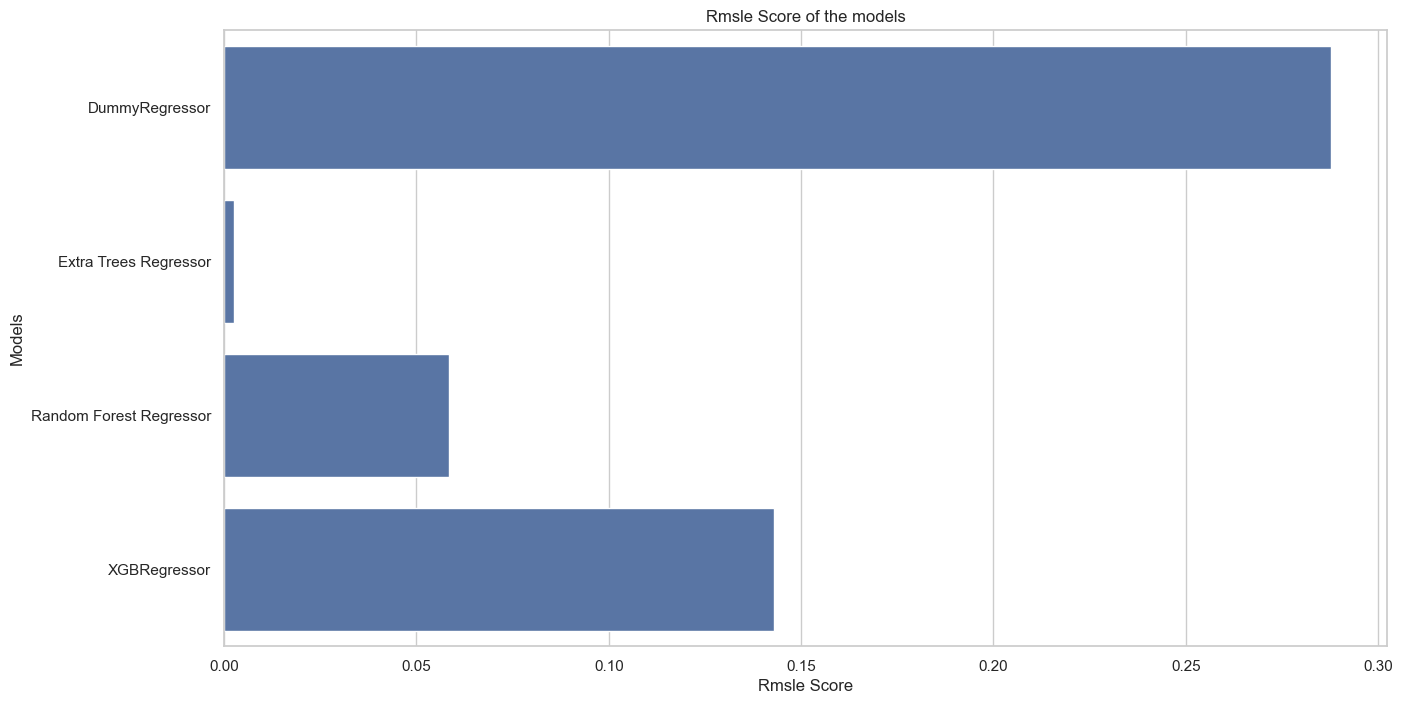

In [47]:
# Plot the RMSLE score of the models and sort them in descending order
plt.figure(figsize=(15, 8))
sns.barplot(x=rmsle_train_list, y=model_list)
plt.title('Rmsle Score of the models')
plt.xlabel('Rmsle Score')
plt.ylabel('Models')
plt.show()

> a function to plot the scatterplot of ypred vs y

> Permutation feature importance

## 12. Ensemble 

https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py 
### 12.1. Investigate the correlation between each 
https://christophm.github.io/interpretable-ml-book/pdp.html 


## 13. Model prediction

## 14. Futher improvements

1. Add Recursive Feature elimination to the model pipeline to customize the feature sets input to different models[1]
2. Create new features by binning continouous numerical features as ordinal features
3. Detail investigation on the logics of different models, their required conditions on the dataset, parameters for fine-tuning 
4. Investigate better logics in ensembling different models. Such as, if we can customize different features set for different selected models, and ensemble them to predict the final outcomes.
5. Implement more sophisticated outlier detection methods
6. Use of auto-feature engineering libraries, such as AutoML

<br> Reference:
<br> [1] https://machinelearningmastery.com/rfe-feature-selection-in-python/
<br> [2] https://developers.google.com/machine-learning/guides/deep-learning-tuning-playbook  